# A. Importing and cleaning the data

You will start by downloading the data from the Kaggle link provided and import it into pandas. You will then need to clean this data using the tools and methods covered in this course. There is not just one correct way to do this. Several solutions will be accepted as long as you demonstrate that you have sufficiently cleaned the data. This includes, of course, dealing with missing values, standardising entries and text data, bringing text or time entries in a common format, dealing with duplicates or incorrect values or getting certain data in more useful formats.

## Step 1 - Loading the data "The Open Food Facts"

In [1]:
# import the data that seems to be tab seperated
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from pandas import Series, DataFrame

#wfd=pd.read_csv("C:/Users/tgdkujo2/Documents/EPFL_Data_Analytics/2 - APPLIED DATA ANALYSIS/09. Course Project/world-food-facts/en.openfoodfacts.org.products.tsv",  sep="\t", low_memory=False)
wfd=pd.read_csv("en.openfoodfacts.org.products.tsv",  sep="\t", low_memory=False)

## Step 2 - DataFrame informations

Set dataframe disyplay options to scroll over all columns

In [2]:
#pd.set_option('display.float_format',lambda x: '{:.5f}'.format(x))
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [3]:
wfd

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

In [4]:
print('There are in total {:,} rows with'.format(wfd.shape[0]) + ' {} columns in our data'.format(wfd.shape[1]))

There are in total 356,027 rows with 163 columns in our data


**Get some more information about our data**

In [5]:
pd.options.display.max_info_columns

100

In [6]:
# since by default, the setting in pandas.options.display.max_info_columns (=100) is used, we set max_cols=200
wfd.info(max_cols=20) # temporary increase parameter from 20 to 200

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


The class information tells us that the object data is indeed a DataFrame. We also get the following information about it
* each row was assigned an index from 0 to 356026
* there are 356027 rows
* there are 163 columns
* 107 columns are from type fload64 and 56 are from type object, which is ok
* we have a lot of missing (null) values in our DataFrame, which is bad

**Get data type of each column**

In [7]:
pd.set_option('display.max_rows', 20) # temporary increase parameter from 20 to 200
wfd.dtypes

code                                     object
url                                      object
creator                                  object
created_t                                object
created_datetime                         object
last_modified_t                          object
last_modified_datetime                   object
product_name                             object
generic_name                             object
quantity                                 object
                                         ...   
fruits-vegetables-nuts_100g             float64
fruits-vegetables-nuts-estimate_100g    float64
collagen-meat-protein-ratio_100g        float64
cocoa_100g                              float64
chlorophyl_100g                         float64
carbon-footprint_100g                   float64
nutrition-score-fr_100g                 float64
nutrition-score-uk_100g                 float64
glycemic-index_100g                     float64
water-hardness_100g                     

**Changing the index: Set column "code" as index**

In [8]:
wfd['code'].isnull().sum()

26

In [9]:
# first drop the rows with missing values in column 'code'
wfd.dropna(subset=['code'], inplace=True)

In [10]:
wfd['code'].isnull().sum()

0

In [11]:
wfd.set_index('code', inplace=True)

In [12]:
wfd.index

Index(['0000000003087', '0000000004530', '0000000004559', '0000000016087', '0000000016094', '0000000016100', '0000000016117', '0000000016124', '0000000016193', '0000000016513',
       ...
       '99111250', '9918', '9935010000003', '99410148', '9948282780603', '99567453', '9970229501521', '9977471758307', '9980282863788', '999990026839'], dtype='object', name='code', length=356001)

Now we can see that data is indexed by column "code".

**Inspect DataFrame**

This gives us a quick snapshot of some important statistics about the numerical columns. 

In [13]:
wfd.describe()
# we can already see that there are some outliers which will be handled later on

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,263823.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,1.000,0.0,0.0,0.0,1.0,0.0,23040.000000,23075.000000,938.000000,201.000000,37.000000,63.000000,207.000000,159.000000,9.000000,1.000,0.0,25.000000,15.000000,0.0,0.0,0.0,0.0,0.0,143443.000000,144170.000000,2.792200e+05,279186.000000,85.000000,32.000000,44.000000,278.000000,6.00000,11.000000,291.000000,451.000000,2.206830e+05,2.941420e+05,29.000000,17.000000,9.000000,289739.000000,289694.000000,4577.000000,137706.000000,35.000000,7207.000000,1472.000000,930.000000,141060.000000,11277.000000,10925.000000,11820.000000,6897.000000,5330.000000,3046.000000,5.390000e+03,331.000000,2525.000000,47.000000,99.000000,24848.000000,198.000000,141517.000000,5938.000000,140660.000000,6392.000000,3964.000000,2122.000000,1639.000000,99.000000,1181.000000,23.000000,20.000000,288.000000,91.000000,33.000000,52.000000,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,5.092460,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,0.064,NaN,NaN,NaN,61.0,NaN,10.501218,6.372548,3.476176,2.200218,3.214568,0.643748,18.734295,12.463013,0.051344,0.095,NaN,41.243200,26.053333,NaN,NaN,NaN,NaN,NaN,0.073487,0.020065,5.614020e+04,15.673428,12.822353,2.864063,24.836364,6.007263,17.10000,12.163636,30.943230,49.098894,3.843467e+05,5.326942e+04,4.398966,2.400000,0.021678,1.941281,0.764401,8.278337,0.000398,0.503896,0.000008,0.053610,0.033854,0.023394,0.332167,0.256490,0.014769,0.046952,0.006820,0.205586,2.741797e-04,0.000134,0.057646,0.012972,0.132496,0.424284,0.079895,0.127284,0.613267,0.003791,0.531415,0.007921,0.025613,0.003165,0.010042,0.003098,0.001478,0.000230,0.000465,2.075503,12.262055,6.476138,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,7.965148,NaN,NaN,NaN,0.226274,24.101433,NaN,Na

## Step 3 - Dealing with NaNs and Duplicates

**Check if there are duplicated rows in the DataFrame based on all columns**

In [14]:
NumberOfDuplicatedRows=wfd.duplicated(subset=None).sum()
print("Number of duplicated Rows:",NumberOfDuplicatedRows)

Number of duplicated Rows: 0


In [15]:
#pd.options.mode.use_inf_as_na = True

**Dropping rows with missing data**

In [16]:
wfd.shape

(356001, 162)

In [17]:
# Drop rows only if all the values in the row are missing (NaN), otherwise a big chunk would be removed
wfd.dropna(how='all',inplace=True)

In [18]:
wfd.shape

(356001, 162)

Since the shape has remained the same, there were no rows with missing values

**Dropping columns with missing values for each column in the DataFrame**

First let inspect the columns with missing values

**Absolute Number**

In [19]:
pd.set_option('display.max_rows', 10) # temporary increase parameter from 10 to required value for display reason
# NA values, such as None or :attr:`numpy.NaN`
wfd.isnull().sum().sort_values(ascending=False)

water-hardness_100g          356001
allergens_en                 356001
ingredients_from_palm_oil    356001
nutrition_grade_uk           356001
-butyric-acid_100g           356001
                              ...  
created_datetime                  1
last_modified_datetime            0
last_modified_t                   0
created_t                         0
url                               0
Length: 162, dtype: int64

It looks like many of the columns are completely missing the values, because number of missing values is equal to our number of rows in the DataFrame.
The best would be dropping at least those columns, because there are not of any use. We have to find a reasonable threshold for acceptable missing values and drop all columns that are beyond this threshold.
But let analyse further and find the __percentage__ of missing values for each column by defining a function.

**Percentage Number**

In [20]:
def missingValue(df):
        print ((df.isnull().sum() * 100/ len(df)).sort_values(ascending=False))
    
missingValue(wfd)

water-hardness_100g          100.000000
allergens_en                 100.000000
ingredients_from_palm_oil    100.000000
nutrition_grade_uk           100.000000
-butyric-acid_100g           100.000000
                                ...    
created_datetime               0.000281
last_modified_datetime         0.000000
last_modified_t                0.000000
created_t                      0.000000
url                            0.000000
Length: 162, dtype: float64


i.e. water-hardness_100g is missing values by 100%

**Use Histogram plot to show distributions of the missing values (NaN)**

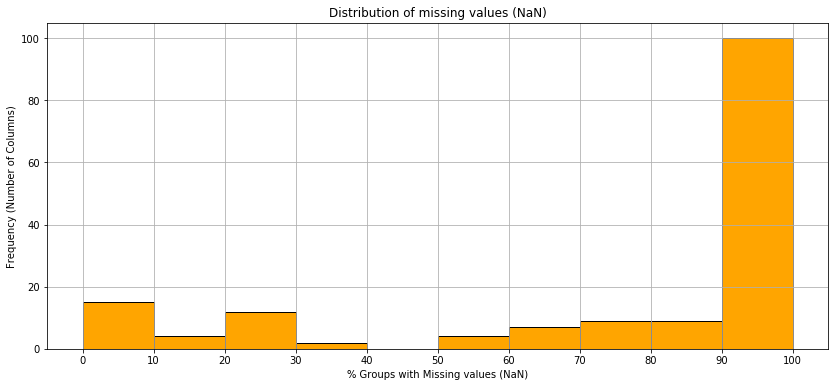

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

#wfd.isnull().sum().plot(kind='hist', grid=True, figsize=(15,5), color='orange', edgecolor='black')
(wfd.isnull().sum() * 100/ len(wfd)).plot(kind='hist', grid=True, color='orange', edgecolor='black', figsize=(14,6))
plt.title('Distribution of missing values (NaN)')
plt.xlabel('% Groups with Missing values (NaN)')
plt.ylabel("Frequency (Number of Columns)")

plt.xticks(range(0, 110, 10))

plt.show()

Around 100 columns do have more than 90% missing values, another 8 columns are missing values between 80% and 90%, 8 columns are missing values between 70%-80%, etc.

In order to find a proper threshold let define a function that drops columns if they have missing values beyond a predefined threshold and play a bit around.

In [22]:
def missingValueByPercentage(df,threshold):
    l = []
    l = list(df.drop(df.loc[:,list( (100*(df.isnull().sum()/len(df.index))>=threshold) )].columns, 1).columns.values)
    print("Number of columns having more than %s percent missing values (NaN):"%threshold,(df.shape[1] - len(l)))
    print("Dropping Columns:\n",list(set(list((df.columns.values))) - set(l)))
    return l

# threshold is 20% which means we are going to drop columns having more than 20% of missing values
threshold=80
col=missingValueByPercentage(wfd,threshold)
# list with names of the columns to be deleted
col

Number of columns having more than 80 percent missing values (NaN): 109
Dropping Columns:
 ['cocoa_100g', 'ingredients_from_palm_oil_tags', '-docosahexaenoic-acid_100g', 'cities', 'chloride_100g', 'ph_100g', 'phosphorus_100g', '-montanic-acid_100g', 'traces_tags', 'silica_100g', '-elaidic-acid_100g', 'folates_100g', '-lauric-acid_100g', '-melissic-acid_100g', 'potassium_100g', '-eicosapentaenoic-acid_100g', 'generic_name', 'fluoride_100g', 'energy-from-fat_100g', '-gamma-linolenic-acid_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', 'alcohol_100g', '-lactose_100g', 'polyols_100g', '-caprylic-acid_100g', 'bicarbonate_100g', '-linoleic-acid_100g', 'chlorophyl_100g', 'ingredients_from_palm_oil', '-palmitic-acid_100g', 'manufacturing_places_tags', 'labels_tags', 'monounsaturated-fat_100g', 'serum-proteins_100g', 'ingredients_that_may_be_from_palm_oil', 'traces', '-arachidonic-acid_100g', 'vitamin-b12_100g', 'purchase_places', 'vitamin-k_100g', 'origins', 'emb_codes_tags', 'allerge

['url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [23]:
# create new dataframe with the remaining columns
wfd2=wfd[col].copy()
wfd2.shape

(356001, 53)

In [24]:
# drop all rows that (after dropping some columns) only contain NaNs
wfd2.dropna(axis=0, how='all')
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 356,001 rows with 53 columns in our DataFram left


**Remove Duplicate Rows**

To find and select the duplicate all rows based on all columns call the Daraframe.duplicate() without any subset argument. It will return a Boolean series with True at the place of each duplicated rows except their first occurrence (default value of keep argument is ‘first’). Then pass this Boolean Series to [] operator of Dataframe to select the rows which are duplicate

In [25]:
# We check whether there are any duplicates in our data (this excludes out index-column)
duplicateRowsDF=wfd2.duplicated().sum()
 
print("Duplicate Rows except first occurrence based on all columns are:", duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are: 0


In [26]:
# display the duplicated rows (this excludes out index-column)
duplicateRowsDF=wfd2[wfd2.duplicated(keep=False)]
duplicateRowsDF

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [27]:
# We drop all duplicates from our data and keep last
wfd2.drop_duplicates(keep='last', inplace=True)

In [28]:
# Verify whether there are any duplicates left in our data (this excludes out index-column)
duplicateRowsDF=wfd2.duplicated().sum()
 
print("Duplicate Rows except first occurrence based on all columns are:", duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are: 0


In [29]:
pd.set_option('display.max_columns', 100) # temporary increase parameter from 20 to 200
wfd2.head() # temporary increase parameter from 20 to 200

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,US,en:united-states,United States,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4 - Dealing  with Data Types

In [30]:
# Convert data type of certain columns containg datatime information to datetime 
wfd2['created_datetime'] = pd.to_datetime(wfd2['created_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

wfd2['last_modified_datetime'] = pd.to_datetime(wfd2['last_modified_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [31]:
wfd2[['created_datetime', 'last_modified_datetime']].isnull().sum()

created_datetime          1
last_modified_datetime    0
dtype: int64

In [32]:
wfd2[wfd2['created_datetime'].isnull()]

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3017760038409,http://world-en.openfoodfacts.org/product/3017...,marianne,0,NaT,1488992055,2017-03-08 16:54:15,Lulu la barquette (Fraise),120 g,"Paquet,Carton","paquet,carton",LU,lu,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Sugary snacks,Biscuits and cakes,Biscuits,fr:B...","France,Suisse","en:france,en:switzerland","France,Switzerland","Sirop de glucose-fructose, purée de fraises 27...","Un biscuit (6,66g)",2.0,[ sirop-de-glucose-fructose -> fr:sirop-de-gl...,"en:e330,en:e440","E330 - Citric acid,E440 - Pectins",0.0,0.0,d,Sugary snacks,Biscuits and cakes,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",en:sugary-snacks,Sugary snacks,http://en.openfoodfacts.org/images/products/30...,http://en.openfoodfacts.org/images/products/30...,1480.0,2.1,0.5,NaN,NaN,78.0,60.0,1.2,4.2,0.08,0.031496,NaN,NaN,NaN,NaN,13.0,13.0


In [33]:
# We fills the null
wfd2['created_datetime'].fillna(method='ffill', inplace=True)

In [34]:
wfd2.loc['3017760038409']

url                        http://world-en.openfoodfacts.org/product/3017...
creator                                                             marianne
created_t                                                                  0
created_datetime                                         2017-01-16 01:17:50
last_modified_t                                                   1488992055
                                                 ...                        
vitamin-c_100g                                                           NaN
calcium_100g                                                             NaN
iron_100g                                                                NaN
nutrition-score-fr_100g                                                   13
nutrition-score-uk_100g                                                   13
Name: 3017760038409, Length: 53, dtype: object

## Step 5 - Dealing with Removing Unnecessary Columns

In [35]:
wfd2.head(2)

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17 09:17:46,1474103893,2016-09-17 09:18:13,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.0,0.0,0.0,0.0214,0.0,0.00129,14.0,14.0


In [36]:
# We drop all columns that are not of interest for our investigation
wfd2 = wfd2.drop(columns=['creator',
                          'brands',
                          'brands_tags',
                          'categories',
                          'main_category',
                          'countries',
                          'countries_tags',
                          'additives',
                          'additives_tags',
                          'categories_tags',
                          'states',
                          'states_en',
                          'states_tags',
                          'url',
                          'quantity',
                          'packaging_tags',
                          'packaging',
                          'created_t',
                          'last_modified_t',
                          'ingredients_from_palm_oil_n', 
                          'ingredients_that_may_be_from_palm_oil_n',
                          'pnns_groups_1',
                          'pnns_groups_2',
                          'image_url',
                          'image_small_url',
                         ])

In [37]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 356,001 rows with 28 columns in our DataFram left


In [38]:
wfd2.head(1)

,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000003087,2016-09-17 09:17:46,2016-09-17 09:18:13,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 6 - Dealing  with Renaming Columns

In [39]:
# We rename all columns that contain a dash character "-"
wfd2 = wfd2.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g',
                            'nutrition-score-uk_100g': 'nutrition_score_uk_100g',
                            'vitamin-c_100g': 'vitamin_c_100g',
                            'vitamin-a_100g': 'vitamin_a_100g',
                            'saturated-fat_100g': 'saturated_fat_100g',
                            'trans-fat_100g': 'trans_fat_100g'})

In [40]:
wfd2.head()

,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000003087,2016-09-17 09:17:46,2016-09-17 09:18:13,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000004530,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,NaN,d,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,NaN,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
0000000016087,2017-03-09 10:35:31,2017-03-09 10:35:31,Organic Salted Nut Mix,NaN,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,NaN,d,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
0000000016094,2017-03-09 10:34:13,2017-03-09 10:34:13,Organic Polenta,NaN,United States,Organic polenta,35 g (0.25 cup),0.0,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
pd.set_option('display.max_rows', 50) # temporary increase parameter from 10 to required value for display reason
wfd2.isnull().sum().sort_values(ascending=False)

main_category_en           252752
categories_en              252726
vitamin_a_100g             218295
iron_100g                  215341
vitamin_c_100g             214941
calcium_100g               214484
trans_fat_100g             212558
cholesterol_100g           211831
additives_en               185812
serving_size               139406
fiber_100g                 135318
nutrition_score_uk_100g    101145
nutrition_score_fr_100g    101145
nutrition_grade_fr         101145
saturated_fat_100g          92178
sugars_100g                 76815
carbohydrates_100g          76781
fat_100g                    76504
additives_n                 72134
ingredients_text            72134
sodium_100g                 66307
salt_100g                   66262
proteins_100g               61859
energy_100g                 60634
product_name                17512
countries_en                  275
last_modified_datetime          0
created_datetime                0
dtype: int64

In [42]:
wfd2['product_name'].fillna(value='Unknown product name', inplace=True)

In [43]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 356,001 rows with 28 columns in our DataFram left


In [44]:
# We check again (after having dropped columns) whether there are any duplicates in our data (this excludes out index-column)
wfd2.duplicated().sum()

685

In [45]:
wfd2[wfd2.duplicated(keep=False)]

,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0010300148647,2017-03-09 13:04:20,2017-03-09 13:04:20,Chopped Pecans,NaN,United States,Pecans,30 g (0.25 cup),0.0,NaN,c,NaN,2929.0,73.33,6.67,0.0,0.000,13.33,3.33,10.0,10.00,0.00000,0.000,0.000000,0.0000,0.067,0.00240,9.0,9.0
0011110196125,2017-03-09 16:43:52,2017-03-09 16:43:52,Christmas Cupcakes,NaN,United States,"Cake: sugar, bleached enriched flour (bleached...",57 g (1 CUPCAKE),2.0,"E101 - Riboflavin,E101i - Riboflavin,E375 - Ni...",e,NaN,1908.0,19.30,5.26,0.0,0.035,70.18,52.63,1.8,3.51,1.11506,0.439,0.000000,0.0000,0.035,0.00189,22.0,22.0
0011110196132,2017-03-09 16:43:52,2017-03-09 16:43:52,Christmas Cupcakes,NaN,United States,"Cake: sugar, bleached enriched flour (bleached...",57 g (1 CUPCAKE),2.0,"E101 - Riboflavin,E101i - Riboflavin,E375 - Ni...",e,NaN,1908.0,19.30,5.26,0.0,0.035,70.18,52.63,1.8,3.51,1.11506,0.439,0.000000,0.0000,0.035,0.00189,22.0,22.0
0011110502865,2017-03-09 20:51:12,2017-03-09 20:51:12,2% Reduced Fat Milk,NaN,United States,"Milk, skim milk, vitamin a palmitate, vitamin d3.",240 ml (8 fl oz),0.0,NaN,b,NaN,209.0,2.08,1.25,0.0,0.008,5.00,4.58,0.0,3.33,0.12700,0.050,0.000062,0.0010,0.125,0.00000,0.0,0.0
0011110502971,2017-03-09 20:51:12,2017-03-09 20:51:12,2% Reduced Fat Milk,NaN,United States,"Milk, skim milk, vitamin a palmitate, vitamin d3.",240 ml (8 fl oz),0.0,NaN,b,NaN,209.0,2.08,1.25,0.0,0.008,5.00,4.58,0.0,3.33,0.12700,0.050,0.000062,0.0010,0.125,0.00000,0.0,0.0
0011110669551,2017-03-10 10:52:52,2017-03-10 10:52:52,Soy Sauce,NaN,United States,"Water, hydrolyzed soy protein, salt, dextrose,...",15 ml (1 Tbsp),1.0,E150a - Plain caramel,NaN,NaN,418.0,0.00,NaN,NaN,NaN,13.33,6.67,NaN,6.67,22.35200,8.800,NaN,NaN,NaN,NaN,NaN,NaN
0011110702098,2017-03-10 10:52:52,2017-03-10 10:52:52,Soy Sauce,NaN,United States,"Water, hydrolyzed soy protein, salt, dextrose,...",15 ml (1 Tbsp),1.0,E150a - Plain caramel,NaN,NaN,418.0,0.00,NaN,NaN,NaN,13.33,6.67,NaN,6.67,22.35200,8.800,NaN,NaN,NaN,NaN,NaN,NaN
0011110847539,2017-03-09 12:34:28,2017-03-09 12:34:28,Pinto Beans,NaN,United States,Pinto beans.,35 g (0.25 cup),0.0,NaN,a,NaN,1075.0,0.00,0.00,0.0,0.000,57.14,2.86,14.3,20.00,0.03556,0.014,0.000000,0.0069,0.114,0.00514,-7.0,-7.0
0011110859617,2017-03-09 12:34:28,2017-03-09 12:34:28,Pinto Beans,NaN,United States,Pinto beans.,35 g (0.25 cup),0.0,NaN,a,NaN,1075.0,0.00,0.00,0.0,0.000,57.14,2.86,14.3,20.00,0.03556,0.014,0.000000,0.0069,0.114,0.00514,-7.0,-7.0


In [46]:
# We drop all duplicates from our data
wfd2.drop_duplicates(inplace=True)

In [47]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 355,316 rows with 28 columns in our DataFram left


## Step 7 - Detecting and filtering outliers

Check correlation of 'nutrition_score_fr_100g' and 'nutrition_score_uk_100g'. Actually they are supposed to be equal.

**nutrition-score-fr_100g:** experimental nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg).

**nutrition-score-uk_100g:** nutrition score defined by the UK Food Standards Administration (FSA)

C:\Users\tgdkujo2\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


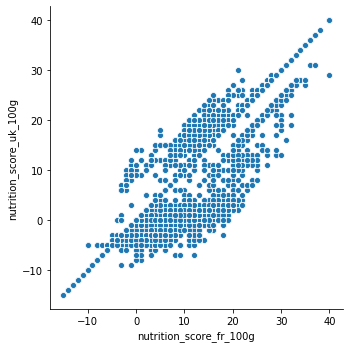

In [48]:
sns.pairplot(wfd2, x_vars=['nutrition_score_fr_100g'], y_vars=['nutrition_score_uk_100g'], size=5);
plt.show();

Now we are going to find outliers, means detecting abnormal values within our data structure and apply data cleaning process. 
Doing so we will later make use of the mean and standard deviation. 

**A common method for deciding what constitutes an outlier is the "3 times the standard deviation" rule**

But let first eliminate all rows containing values that are impossible by definition (except of 'energy_100g'); all numeric "_100g" columns are considered; rows containing values>100 are removed from our DataFrame. Inspect the data by the following command:

In [49]:
wfd2.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,283209.000000,294709.000000,2.788390e+05,263299.000000,142935.000000,143672.000000,2.785630e+05,278650.000000,2.202530e+05,2.934860e+05,289083.000000,289038.000000,137279.000000,140635.000000,141092.000000,140229.000000,254419.000000,254419.000000
mean,1.879181,1125.454576,5.619814e+04,5.093785,0.073585,0.020062,5.627255e+04,15.669402,3.850971e+05,5.338848e+04,1.943020,0.765086,0.000398,0.023452,0.127471,0.003798,9.172236,8.986436
std,2.502346,936.518056,2.966879e+07,7.966005,1.541752,0.358573,2.968348e+07,21.973198,1.807290e+08,2.891897e+07,120.682128,47.516346,0.073353,2.238302,3.354268,0.216898,8.998887,9.151170
min,0.000000,0.000000,0.000000e+00,0.000000,-3.570000,0.000000,0.000000e+00,-17.860000,-6.700000e+00,-8.000000e+02,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,384.000000,1.000000e-01,0.000000,0.000000,0.000000,5.600000e+00,1.200000,0.000000e+00,7.700000e-01,0.060000,0.023622,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1092.000000,5.300000e+00,1.790000,0.000000,0.000000,2.000000e+01,5.400000,1.500000e+00,4.900000e+00,0.560000,0.220472,0.000000,0.000000,0.036000,0.001010,10.000000,9.000000
75%,3.000000,1674.000000,2.000000e+01,7.140000,0.000000,0.020000,5.758000e+01,23.330000,3.600000e+00,1.000000e+01,1.358900,0.535000,0.000107,0.003800,0.107000,0.002400,16.000000,16.000000
max,30.000000,231199.000000,1.566667e+10,550.000000,369.000000,95.238000,1.566667e+10,3520.000000,8.481815e+10,1.566667e+10,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


We can already see from the min and max that we have outliers (even values that makes no sense by definition)

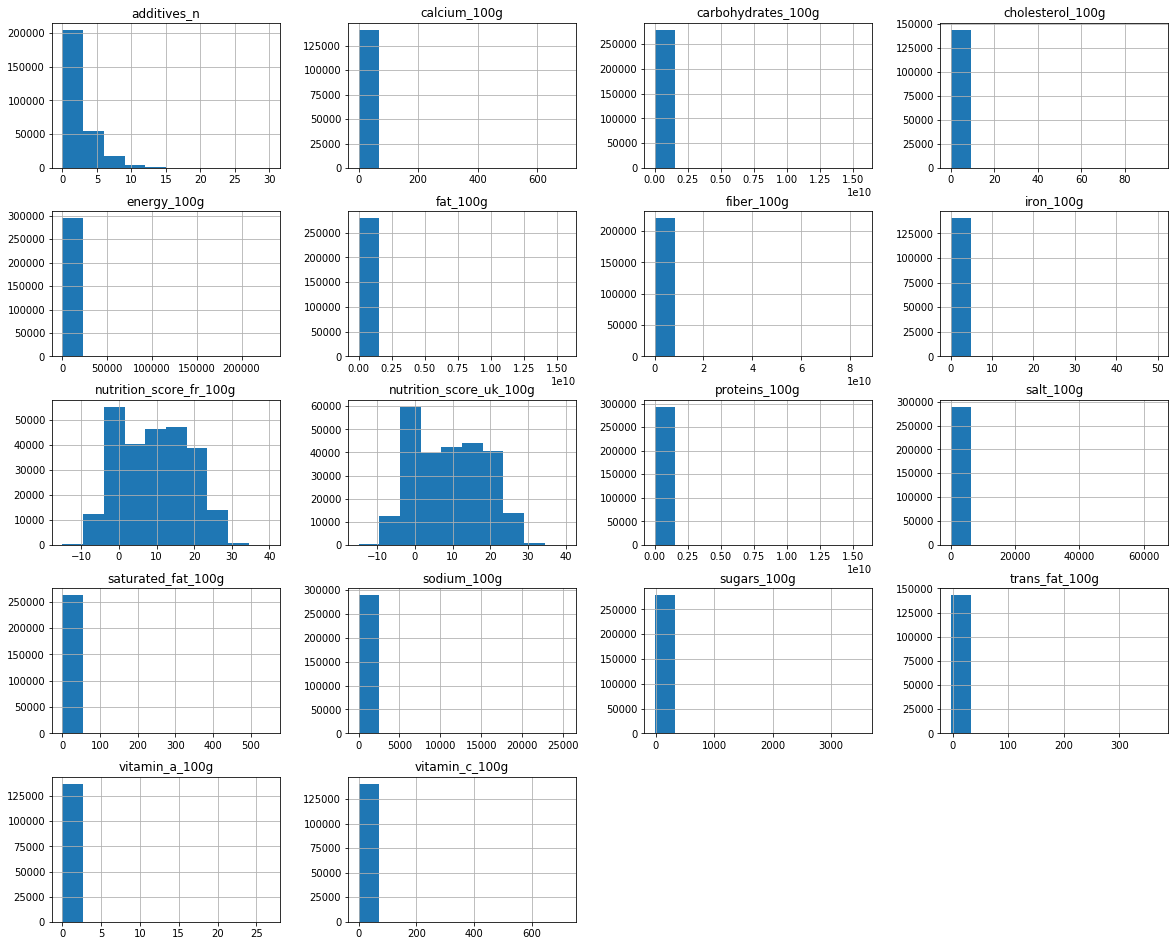

In [50]:
wfd2.hist(figsize=(20,20), layout=(6,4))

plt.show()

In [51]:
wfd2.dtypes

created_datetime           datetime64[ns]
last_modified_datetime     datetime64[ns]
product_name                       object
categories_en                      object
countries_en                       object
ingredients_text                   object
serving_size                       object
additives_n                       float64
additives_en                       object
nutrition_grade_fr                 object
main_category_en                   object
energy_100g                       float64
fat_100g                          float64
saturated_fat_100g                float64
trans_fat_100g                    float64
cholesterol_100g                  float64
carbohydrates_100g                float64
sugars_100g                       float64
fiber_100g                        float64
proteins_100g                     float64
salt_100g                         float64
sodium_100g                       float64
vitamin_a_100g                    float64
vitamin_c_100g                    

In [52]:
# get complement columns and eliminate rows with values>=100
wfd2 = wfd2[ (wfd2[ wfd2.columns.difference(['energy_100g','product_name','countries_en','categories_en','ingredients_text','serving_size','additives_n','additives_en','nutrition_grade_fr','main_category_en','created_datetime','last_modified_datetime']) ] <= 100).all(1) ]

# get complement columns and eliminate rows with values<0; 'nutrition_score_fr_100g' and 'nutrition_score_uk_100g' can have values between -15 and +40
wfd2=wfd2[ (wfd2[ wfd2.columns.difference(['nutrition_score_fr_100g','nutrition_score_uk_100g','energy_100g','product_name','countries_en','categories_en','ingredients_text','serving_size','additives_n','additives_en','nutrition_grade_fr','main_category_en','created_datetime','last_modified_datetime']) ] >=0 ).all(1)]

#filter_all = np.abs(df-df.mean())>(3*df.std())

In [53]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))
# 125962, 28

There are in total 125,962 rows with 28 columns in our DataFram left


We have got reduced the number of rows.
Check the statistic data again after cleansing

In [54]:
wfd2.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,125661.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000,125962.000000
mean,2.047015,1214.497195,13.402384,4.720013,0.062534,0.017907,35.565609,15.395302,2.857155,7.961003,1.273575,0.501407,0.000131,0.006074,0.091704,0.002415,9.418952,9.409108
std,2.606610,746.306629,15.476314,6.852804,0.927286,0.270500,28.170480,19.512181,4.398711,8.182890,3.604169,1.418949,0.000552,0.106550,0.233244,0.149703,9.032997,9.038523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000
25%,0.000000,494.000000,0.830000,0.000000,0.000000,0.000000,9.170000,1.670000,0.000000,2.350000,0.144780,0.057000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1272.000000,7.810000,1.790000,0.000000,0.000000,28.570000,5.880000,1.500000,5.650000,0.744220,0.293000,0.000000,0.000000,0.035000,0.000960,10.000000,10.000000
75%,3.000000,1761.000000,21.430000,7.140000,0.000000,0.019000,60.710000,24.290000,3.600000,10.810000,1.450340,0.571000,0.000100,0.002100,0.100000,0.002400,17.000000,17.000000
max,30.000000,14644.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,99.905820,39.333000,0.051818,35.714300,50.000000,50.000000,40.000000,40.000000


We can see from the min and max that we have removed those non-valid data rows from our DataFrame

The three main categories of macronutrients include carbohydrate, protein and fat. We are going to remove rows from our DataFrame with fat_100g+carbpjydates_100g+proteins_100g>100, because this not possible by definition.

In [55]:
wfd2=wfd2[(wfd2['fat_100g'] + wfd2['carbohydrates_100g'] + wfd2['proteins_100g'])<=100]

In [56]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 124,522 rows with 28 columns in our DataFram left


Re-check correlation of 'nutrition_score_fr_100g' and 'nutrition_score_uk_100g' and see that it's look much better than before

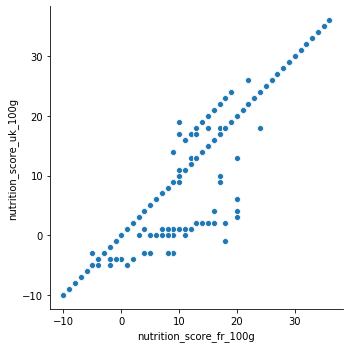

In [57]:
sns.pairplot(wfd2, x_vars=['nutrition_score_fr_100g'], y_vars=['nutrition_score_uk_100g'], size=5);
plt.show()

In [58]:
wfd2[wfd2['nutrition_score_uk_100g'] != wfd2['nutrition_score_fr_100g']].shape

(191, 28)

In [59]:
# keep only those rows having same score both for uk and fr
wfd2 = wfd2.loc[wfd2['nutrition_score_uk_100g'] == wfd2['nutrition_score_fr_100g']]
wfd2.shape

(124331, 28)

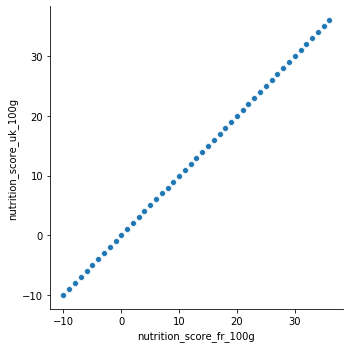

In [60]:
sns.pairplot(wfd2, x_vars=['nutrition_score_fr_100g'], y_vars=['nutrition_score_uk_100g'], size=5);
plt.show()

We keep only one column and rename it

In [61]:
wfd2 = wfd2.rename(columns={'nutrition_score_fr_100g': 'nutrition_score_100g'})

In [62]:
wfd2 = wfd2.drop(columns=['nutrition_score_uk_100g'])

In [63]:
wfd2.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g
count,124054.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000,124331.000000
mean,2.052816,1203.507561,13.219552,4.651381,0.061455,0.017984,35.257211,15.250247,2.827591,7.919169,1.277005,0.502757,0.000131,0.006082,0.091833,0.002414,9.327264
std,2.611983,739.776921,15.347104,6.759636,0.922727,0.272236,28.074913,19.397593,4.356004,8.130977,3.623325,1.426490,0.000541,0.107180,0.234055,0.150681,9.014503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,0.000000,490.000000,0.800000,0.000000,0.000000,0.000000,8.940000,1.670000,0.000000,2.350000,0.144780,0.057000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1255.000000,7.500000,1.770000,0.000000,0.000000,28.170000,5.710000,1.500000,5.560000,0.746760,0.294000,0.000000,0.000000,0.035000,0.000960,10.000000
75%,3.000000,1745.000000,21.430000,7.060000,0.000000,0.019000,60.710000,23.925000,3.600000,10.710000,1.450340,0.571000,0.000100,0.002100,0.100000,0.002400,16.000000
max,30.000000,14644.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,99.905820,39.333000,0.051818,35.714300,50.000000,50.000000,36.000000


__Measures of center and spread__
The mean is easily affected by outliers. 
Another concept of the center which is less affected by outliers is the median. The median is obtained by sorting the data set and then taking the value which is in the middle. If the data set has an odd number of entries that this will be a unique value. If the dataset has an even number of entries then there will be two values in the middle and the median is defined as their average in this case

Let's visualize data in a boxplot, which can show whether a data set is symmetric (roughly the same on each side when cut down the middle) or skewed (lopsided).
A symmetric data set shows the median roughly in the middle of the box. Take only the columns of data type floats.
Skewed data show a lopsided boxplot, where the median cuts the box into two unequal pieces. 
If the longer part of the box is to the right (or above) the median, the data is said to be skewed right. If the longer part is to the left (or below) the median, the data is skewed left.

In the below figures, many data is skewed (as they are not included in the box of other observation)

__Discover outliers with visualization tools - Box Plot__

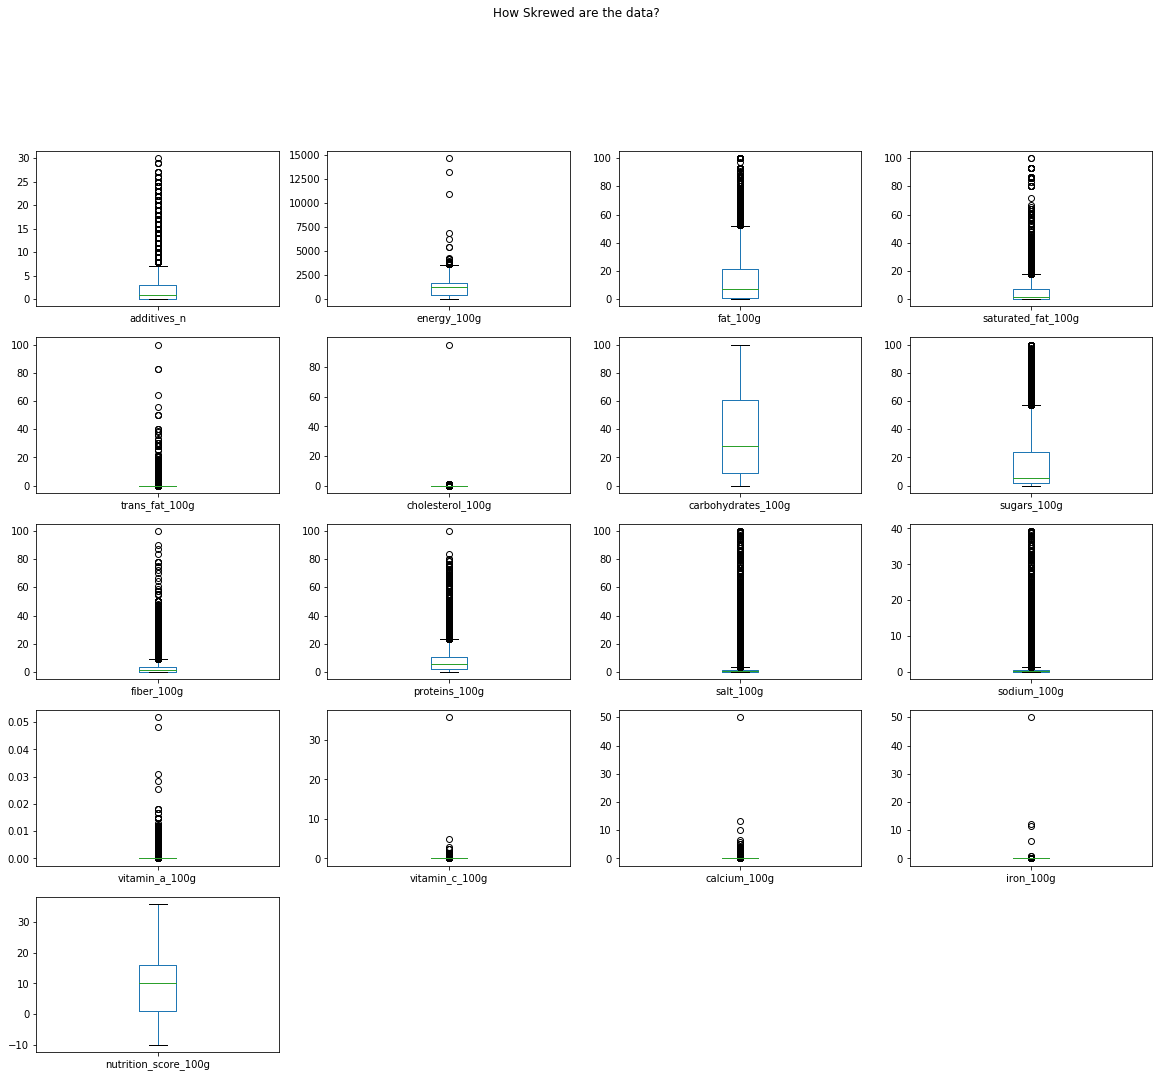

In [64]:
wfd2.select_dtypes(include=float).plot(kind='box', subplots=True, title='How Skrewed are the data?', figsize=(20,20), layout=(6,4))
plt.show()

As we do not have categorical value in our observations it's not that easy to decide whether or not we can ignore them.
We do not know if they are the result of a mistake (then we can ignore them) but if it is just a variance in the data we would need think a bit further. Before we try to understand whether to ignore the outliers or not, we need to know the ways to identify them.

A more commonly used measure of spread is the standard deviation. The standard deviation is a measure of how far away the data points are from the mean.

__Discover outliers with mathematical function Z-Score__

The z-score is an essential value in statistics. We want to drop the outliers only on numerical attributes (categorical variables can hardly be outliers). Z-Score essentially tells us how far away a specific data value is from the mean. The z-score helps us normalize data and put it in context in terms of its mean.

In [65]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 124,331 rows with 27 columns in our DataFram left


In [66]:
# We eliminate all values (outliers) that are more than 3 std's from the mean
#wfd2 = wfd2[np.abs(wfd2['additives_n']-wfd2['additives_n'].mean())<=(3*wfd2['additives_n'].std())]
#wfd2 = wfd2[np.abs(wfd2['energy_100g']-wfd2['energy_100g'].mean())<=(3*wfd2['energy_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['fat_100g']-wfd2['fat_100g'].mean())<=(3*wfd2['fat_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['saturated_fat_100g']-wfd2['saturated_fat_100g'].mean())<=(3*wfd2['saturated_fat_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['trans_fat_100g']-wfd2['trans_fat_100g'].mean())<=(3*wfd2['trans_fat_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['cholesterol_100g']-wfd2['cholesterol_100g'].mean())<=(3*wfd2['cholesterol_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['carbohydrates_100g']-wfd2['carbohydrates_100g'].mean())<=(3*wfd2['carbohydrates_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['sugars_100g']-wfd2['sugars_100g'].mean())<=(3*wfd2['sugars_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['fiber_100g']-wfd2['fiber_100g'].mean())<=(3*wfd2['fiber_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['proteins_100g']-wfd2['proteins_100g'].mean())<=(3*wfd2['proteins_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['salt_100g']-wfd2['salt_100g'].mean())<=(3*wfd2['salt_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['sodium_100g']-wfd2['sodium_100g'].mean())<=(3*wfd2['sodium_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['vitamin_a_100g']-wfd2['vitamin_a_100g'].mean())<=(3*wfd2['vitamin_a_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['vitamin_c_100g']-wfd2['vitamin_c_100g'].mean())<=(3*wfd2['vitamin_c_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['calcium_100g']-wfd2['calcium_100g'].mean())<=(3*wfd2['calcium_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['iron_100g']-wfd2['iron_100g'].mean())<=(3*wfd2['iron_100g'].std())]
#wfd2 = wfd2[np.abs(wfd2['nutrition_score_100g']-wfd2['nutrition_score_100g'].mean())<=(3*wfd2['nutrition_score_100g'].std())]

In [67]:
wfd2.select_dtypes(include=['float64']).isnull().sum()

additives_n             277
energy_100g               0
fat_100g                  0
saturated_fat_100g        0
trans_fat_100g            0
cholesterol_100g          0
carbohydrates_100g        0
sugars_100g               0
fiber_100g                0
proteins_100g             0
salt_100g                 0
sodium_100g               0
vitamin_a_100g            0
vitamin_c_100g            0
calcium_100g              0
iron_100g                 0
nutrition_score_100g      0
dtype: int64

In [68]:
# Drop rows having missing (NaN) values in case columns data type is float64, this is to enable calculation of the Z-Score (error occurs otherwise)
wfd2.drop(wfd2.index[wfd2.select_dtypes(include=['float64']).isnull().any(axis=1)], inplace=True)

In [69]:
wfd2.select_dtypes(include=['float64']).isnull().sum()

additives_n             0
energy_100g             0
fat_100g                0
saturated_fat_100g      0
trans_fat_100g          0
cholesterol_100g        0
carbohydrates_100g      0
sugars_100g             0
fiber_100g              0
proteins_100g           0
salt_100g               0
sodium_100g             0
vitamin_a_100g          0
vitamin_c_100g          0
calcium_100g            0
iron_100g               0
nutrition_score_100g    0
dtype: int64

In [70]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 124,054 rows with 27 columns in our DataFram left


In [71]:
#constrains=wfd2.select_dtypes(include=['float64']).apply(lambda x: False if x['additives_n'] == 0 else True , axis=1)
#wfd2.loc[wfd2.index[constrains]].describe()

In [72]:
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=['float64']) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type='reduce').all(axis=1)
    # Drop (inplace) values set to be rejected (values with more than 3std away from the mean)
    df.drop(df.index[~constrains], inplace=True)

In [73]:
# drop values if they are more than z_threshold times away from the mean 
drop_numerical_outliers(wfd2)

In [74]:
print('There are in total {:,} rows with'.format(wfd2.shape[0]) + ' {} columns in our DataFram left'.format(wfd2.shape[1]))

There are in total 109,615 rows with 27 columns in our DataFram left


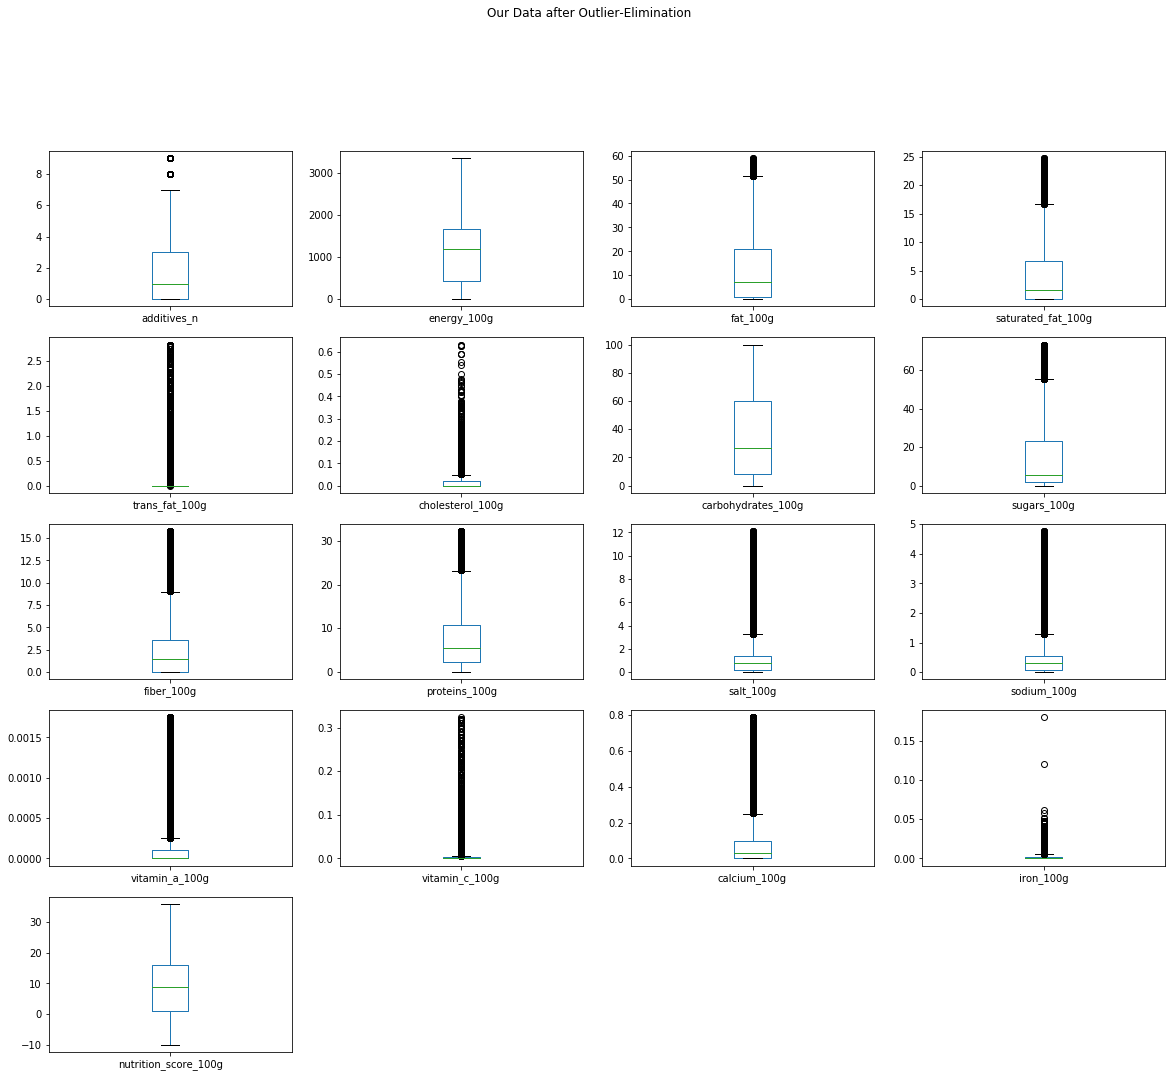

In [75]:
wfd2.select_dtypes(include=float).plot(kind='box', subplots=True, title='Our Data after Outlier-Elimination', figsize=(20,20), layout=(6,4))
plt.show()

In [76]:
# Extract the numeric amount of grams from the 'serving_size' column
wfd2['serving_size_in_g'] = wfd2['serving_size'].str.extract('(\d?\d?\d)', expand=True ).dropna().astype(int)

In [77]:
# We use the column 'serving_size' to indicate whether the product is liquid or solid (1/0)
wfd2['is_liquid_binary'] = wfd2['serving_size'].str.contains('l|oz', case=False).dropna().astype(int)
wfd2['liquid/solid'] = wfd2['is_liquid_binary'].map({1:'liquid',0:'solid'})

In [78]:
wfd2.isnull().sum()

created_datetime               0
last_modified_datetime         0
product_name                   0
categories_en             108422
countries_en                   0
ingredients_text               0
serving_size                   3
additives_n                    0
additives_en               36568
nutrition_grade_fr             0
main_category_en          108422
energy_100g                    0
fat_100g                       0
saturated_fat_100g             0
trans_fat_100g                 0
cholesterol_100g               0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
vitamin_a_100g                 0
vitamin_c_100g                 0
calcium_100g                   0
iron_100g                      0
nutrition_score_100g           0
serving_size_in_g              3
is_liquid_binary               3
liquid/solid                   3
dtype: int

In [79]:
wfd2.dropna(subset=['is_liquid_binary', 'liquid/solid', 'serving_size_in_g'], inplace=True)

In [80]:
wfd2.head()

,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g,serving_size_in_g,is_liquid_binary,liquid/solid
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,NaN,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.0,60.71,17.86,7.1,17.86,0.63500,0.250,0.000000,0.0,0.071,0.00129,0.0,28.0,0.0,solid
0000000033640,2017-03-09 09:07:04,2017-03-09 09:07:05,Granola Cranberry And Acai,NaN,United States,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,NaN,c,NaN,1824.0,10.91,0.91,0.0,0.0,74.55,25.45,5.5,9.09,0.25400,0.100,0.000000,0.0,0.036,0.00262,6.0,55.0,0.0,solid
0000000033688,2017-03-09 09:07:04,2017-03-09 09:07:04,"Peanuts, Mixed Nuts",NaN,United States,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,E415 - Xanthan gum,d,NaN,2389.0,42.86,7.14,0.0,0.0,25.00,14.29,7.1,25.00,0.54356,0.214,0.000000,0.0,0.071,0.00514,14.0,28.0,0.0,solid
0000000043595,2017-03-09 09:07:04,2017-03-09 09:07:04,Cranberries,NaN,United States,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,NaN,c,NaN,1255.0,0.00,0.00,0.0,0.0,83.33,66.67,10.0,0.00,0.00000,0.000,0.000000,0.0,0.000,0.00000,8.0,30.0,0.0,solid
0000000045292,2017-03-09 14:32:38,2017-03-09 14:32:38,Turkish Apricots,NaN,United States,"Apricots, sulfur dioxide.",40 g (7 PIECES),1.0,E220 - Sulphur dioxide,c,NaN,1046.0,0.00,0.00,0.0,0.0,62.50,52.50,7.5,2.50,0.00000,0.000,0.001125,0.0,0.050,0.00360,8.0,40.0,0.0,solid


In [81]:
# We split all entries in the 'additives_en' column and create a new row for each in one new dataframe
exp_additives = wfd2['additives_en'].str.split(',').apply(Series, 1).stack()
exp_additives.index = exp_additives.index.droplevel(-1)
exp_additives.name = 'additives_exp'
data_exp_additives = wfd2.join(exp_additives)

In [82]:
# We split all entries in the 'categories_en' column and create a new row for each in one new dataframe
# We use the 'categories_en' column rather than th 'main_column' because there are many NaNs and this way we get more data
exp_categories = wfd2['categories_en'].str.split(',').apply(Series, 1).stack()
exp_categories.index = exp_categories.index.droplevel(-1)
exp_categories.name = 'categories_exp'
data_exp_categories = wfd2.join(exp_categories)

In [83]:
# We split all entries in the 'countries_en' column and create a new row for each in one new dataframe
exp_countries = wfd2['countries_en'].str.split(',').apply(Series, 1).stack()
exp_countries.index = exp_countries.index.droplevel(-1)
exp_countries.name = 'countries_exp'
data_exp_countries = wfd2.join(exp_countries)

In [84]:
print('There are {:,} rows '.format(wfd2.shape[0]) + 'and {} columns in our DataFrame'.format(wfd2.shape[1]))

There are 109,612 rows and 30 columns in our DataFrame


In [85]:
wfd2.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g,serving_size_in_g,is_liquid_binary
count,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000,109612.000000
mean,1.855883,1150.716029,12.342462,4.261928,0.013021,0.016803,34.403073,14.372945,2.474008,7.449009,0.996525,0.392333,0.000091,0.004769,0.081504,0.001659,8.875105,74.803708,0.214903
std,2.039394,718.472442,13.612653,5.717885,0.139620,0.032015,27.625227,17.691966,3.067159,6.972294,1.175353,0.462737,0.000198,0.016706,0.142449,0.003168,8.950323,68.287577,0.410757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.000000
25%,0.000000,444.000000,0.880000,0.000000,0.000000,0.000000,8.480000,1.670000,0.000000,2.380000,0.152400,0.060000,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,0.000000
50%,1.000000,1184.000000,7.140000,1.670000,0.000000,0.000000,26.440000,5.600000,1.500000,5.470000,0.746760,0.294000,0.000000,0.000000,0.033000,0.000920,9.000000,46.000000,0.000000
75%,3.000000,1674.000000,21.090000,6.670000,0.000000,0.020000,60.000000,23.080000,3.600000,10.710000,1.407160,0.554000,0.000100,0.002400,0.100000,0.002250,16.000000,105.000000,0.000000
max,9.000000,3347.000000,58.930000,24.730000,2.830000,0.633000,100.000000,73.330000,15.800000,32.260000,12.136120,4.778000,0.001750,0.324000,0.789000,0.180000,36.000000,946.000000,1.000000


# D. Time-series analysis

You will investigate more closely the created_datetime and last_modified_datetime. First, you will analyze the mean time difference between these two values. And second, you will analyze the total number of items created each month over the full timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings

In [86]:
# create a new column 'time_diff' that represents the time difference between created_datetime and last_modified_datetime
wfd2['time_delta'] = (wfd2['created_datetime'] - wfd2['last_modified_datetime'])
wfd2['time_delta'].describe()

count                      109612
mean     -5 days +22:24:52.787806
std       50 days 11:28:43.148479
min          -1670 days +03:00:25
25%               0 days 00:00:00
50%               0 days 00:00:00
75%               0 days 00:00:00
max               0 days 00:00:00
Name: time_delta, dtype: object

In [87]:
print('The mean time difference when an entry was created and modified is {} days'.format(wfd2['time_delta'].mean().days))

The mean time difference when an entry was created and modified is -5 days


In [88]:
# set index to created_datetime to enable grouping by time
wfd2.reset_index(inplace=True)
wfd2.set_index('created_datetime', inplace=True)

In [89]:
wfd2.index.month

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype='int64', name='created_datetime', length=109612)

In [90]:
products_created_by_months = wfd2['product_name'].groupby(wfd2.index.month)

In [91]:
# the total number of items created over the full timeline of the data grouped by month
products_created_by_months.describe()

,count,unique,top,freq
created_datetime,,,,
1,172,170,Tomato Ketchup,2
2,122,120,Spam Classic,2
3,108688,74038,Ice Cream,393
4,64,64,Pita Mediterranean Herb,1
5,30,30,Great Value Raisins,1
6,34,34,Chocolate Lowfat Milk,1
7,171,168,Nutella,2
8,120,118,Unknown product name,3
9,87,85,Creamy Peanut Butter,3


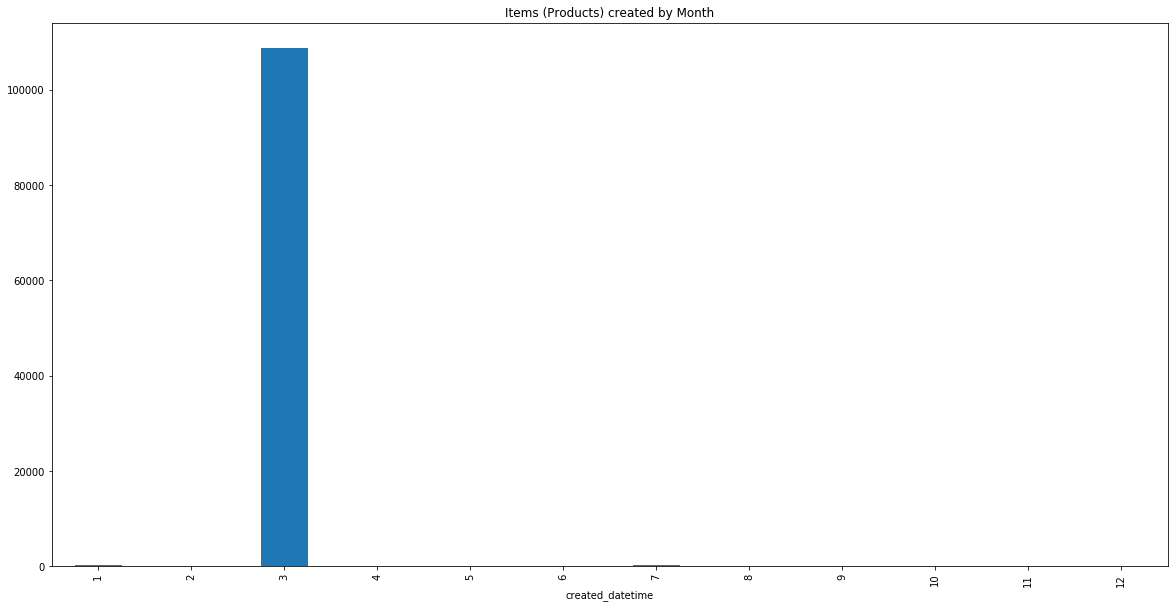

In [92]:
# bar plot of the total number of items created over the full timeline of the data grouped by month
products_created_by_months.count().plot(kind='bar', figsize=(20,10), title='Items (Products) created by Month')

plt.show()

In [93]:
# Resampling our data to month in order to enable visualization of the total number of items created each month over the full timeline of the data 
products_created_by_months = (wfd2.resample('M')['product_name'].count())

In [94]:
products_created_by_months.describe()

count        65.000000
mean       1686.338462
std       13471.766722
min           0.000000
25%           1.000000
50%           5.000000
75%          14.000000
max      108628.000000
Name: product_name, dtype: float64

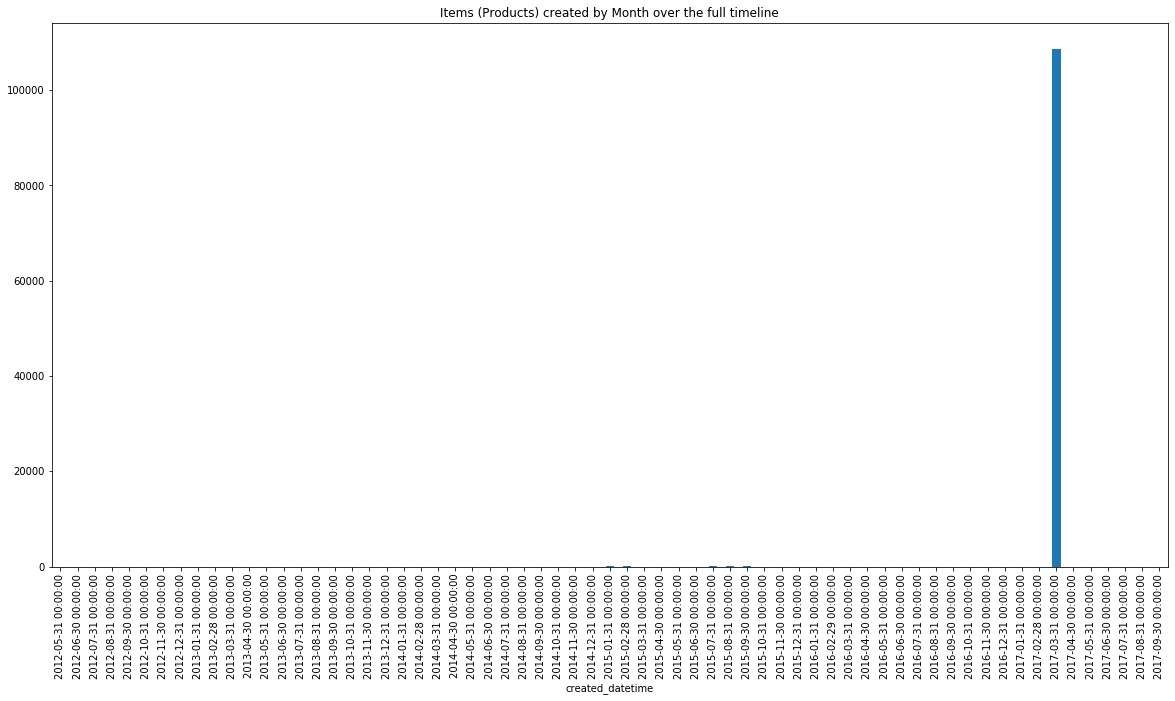

In [95]:
# Total number of items created each month over the full timeline
products_created_by_months.plot( kind='bar', figsize=(20,10), title='Items (Products) created by Month over the full timeline')

plt.show()

In march 2017 we have had the most items created (Ice Cream). There is not much to investigate obout number of items created over the time.

In [96]:
mean_products_created_by_months=products_created_by_months.groupby(products_created_by_months.index.month).mean()

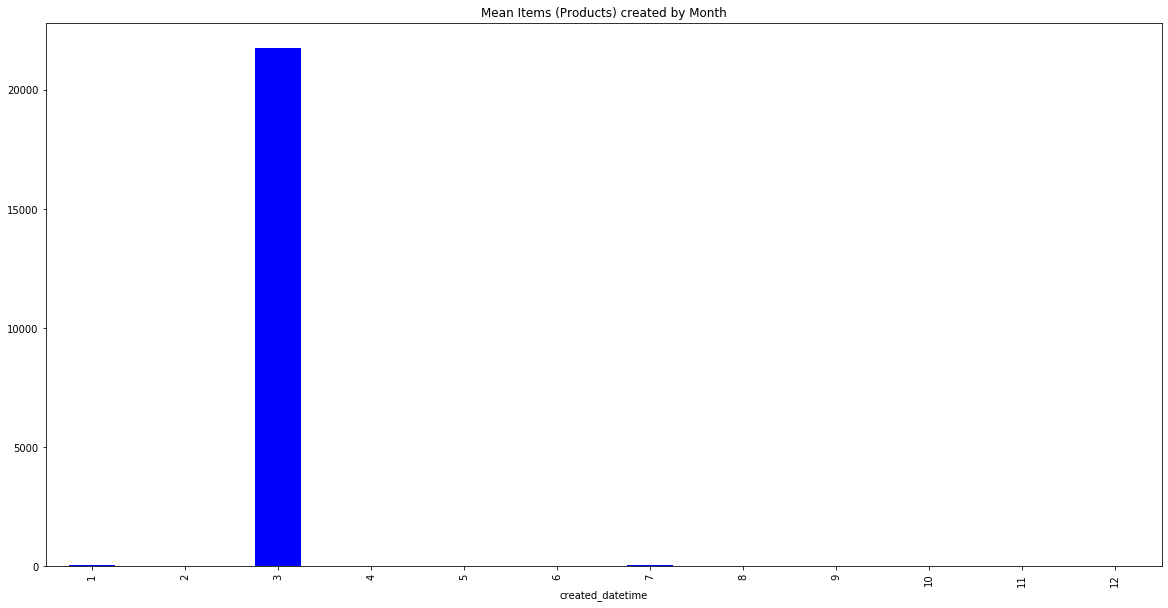

In [97]:
# Mean amount of items created grouped by month
mean_products_created_by_months.plot(kind='bar', figsize=(20,10), color='blue', title='Mean Items (Products) created by Month')

plt.show()

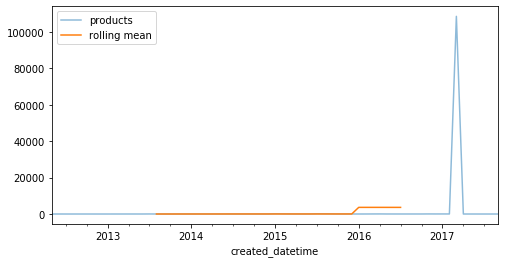

In [98]:
# Create the figure
plt.figure(figsize=(8, 4))

# Compute rolling mean
rolling_30 = products_created_by_months.rolling(30, center=True)

# Plot the results
products_created_by_months.plot( label='products', alpha=0.5)
rolling_30.mean().plot( label='rolling mean')
plt.legend()
plt.show()

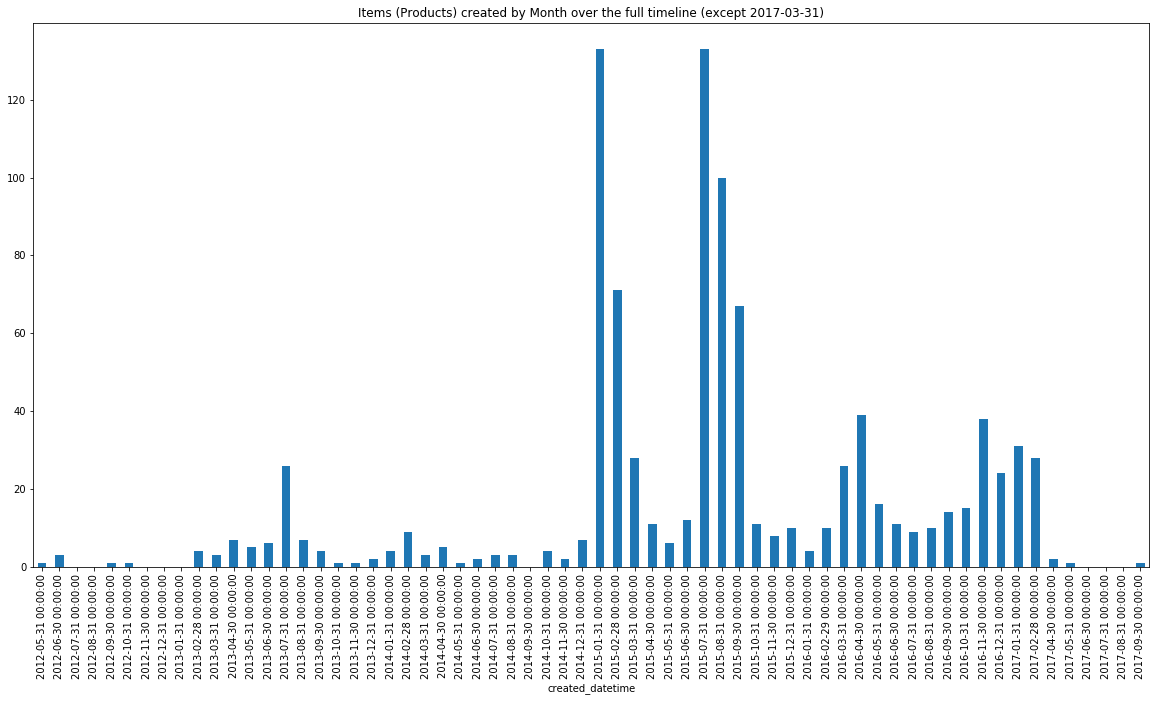

In [99]:
# Select subsets before and after date 2017-03-31
products_created_by_months_subset=products_created_by_months[(products_created_by_months.index < '2017-03-31') | (products_created_by_months.index > '2017-03-31')]
products_created_by_months_subset.plot( kind='bar', figsize=(20,10), title='Items (Products) created by Month over the full timeline (except 2017-03-31)')

In [100]:
# set back the index to column code
wfd2.reset_index(inplace=True)
wfd2.set_index('code', inplace=True)

# C. Text data
You will filter and group your data based on the ingredients_text column. Your goal is to find the five most common ingredients.

In [101]:
wfd2.head()

,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g,serving_size_in_g,is_liquid_binary,liquid/solid,time_delta
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,NaN,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.0,60.71,17.86,7.1,17.86,0.63500,0.250,0.000000,0.0,0.071,0.00129,0.0,28.0,0.0,solid,00:00:00
0000000033640,2017-03-09 09:07:04,2017-03-09 09:07:05,Granola Cranberry And Acai,NaN,United States,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,NaN,c,NaN,1824.0,10.91,0.91,0.0,0.0,74.55,25.45,5.5,9.09,0.25400,0.100,0.000000,0.0,0.036,0.00262,6.0,55.0,0.0,solid,-1 days +23:59:59
0000000033688,2017-03-09 09:07:04,2017-03-09 09:07:04,"Peanuts, Mixed Nuts",NaN,United States,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,E415 - Xanthan gum,d,NaN,2389.0,42.86,7.14,0.0,0.0,25.00,14.29,7.1,25.00,0.54356,0.214,0.000000,0.0,0.071,0.00514,14.0,28.0,0.0,solid,00:00:00
0000000043595,2017-03-09 09:07:04,2017-03-09 09:07:04,Cranberries,NaN,United States,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,NaN,c,NaN,1255.0,0.00,0.00,0.0,0.0,83.33,66.67,10.0,0.00,0.00000,0.000,0.000000,0.0,0.000,0.00000,8.0,30.0,0.0,solid,00:00:00
0000000045292,2017-03-09 14:32:38,2017-03-09 14:32:38,Turkish Apricots,NaN,United States,"Apricots, sulfur dioxide.",40 g (7 PIECES),1.0,E220 - Sulphur dioxide,c,NaN,1046.0,0.00,0.00,0.0,0.0,62.50,52.50,7.5,2.50,0.00000,0.000,0.001125,0.0,0.050,0.00360,8.0,40.0,0.0,solid,00:00:00


In [102]:
from pandas import Series, DataFrame
exp_ingredients = wfd2['ingredients_text'].str.split(',').apply(Series, 1).stack()

In [103]:
# Step 1: We start with creating a new dataframe from the series with EmployeeId as the index
new_df = pd.DataFrame(wfd2['ingredients_text'].str.split(',').tolist(),index=wfd2.index).stack()
# Step 2: We now want to get rid of the secondary index; it can't be an index since the values will be duplicate
new_df.index = new_df.index.droplevel(-1)
# Step 3: The final step is to set the column names as we want them
new_df.name = 'ingredients_splitted'
# Step 4: Join back to the original DataFrame
wfd2_ingredients = wfd2.join(new_df)

In [104]:
wfd2_ingredients['ingredients_splitted'].isnull().sum()

0

In [105]:
wfd2_ingredients['ingredients_splitted'].to_frame().describe()

,ingredients_splitted
count,1256373
unique,128151
top,salt
freq,59063


In [106]:
print('There are {:,} unique ingredients in our DataFrame'.format(wfd2_ingredients['ingredients_splitted'].dropna().unique().shape[0]))

There are 128,151 unique ingredients in our DataFrame


In [107]:
print('The five most common ingredients in our DatadFrame are:\n{}'.format(wfd2_ingredients['ingredients_splitted'].value_counts().sort_values(ascending=False).head(5)))

The five most common ingredients in our DatadFrame are:
 salt          59063
 sugar         37977
 water         34324
 niacin        15464
 riboflavin    14000
Name: ingredients_splitted, dtype: int64


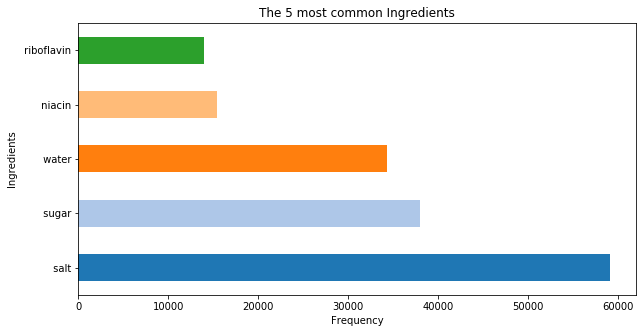

In [108]:
colormap = plt.cm.tab20(range(0, len(wfd2_ingredients['ingredients_splitted'].value_counts().sort_values().head(5))))
wfd2_ingredients['ingredients_splitted'].value_counts().sort_values(ascending=False).head(5).plot(kind='barh', color=colormap, figsize=(10,5), title='Most 5 common ingredients in our DataFrame')
plt.xlabel('Frequency')
plt.ylabel('Ingredients')
plt.title('The 5 most common Ingredients')
plt.show()

# F. Finding correlations
You will try to find correlations between the different data fields. Your goal is to identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.

In [109]:
wfd2.head()

,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g,serving_size_in_g,is_liquid_binary,liquid/solid,time_delta
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,NaN,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.0,60.71,17.86,7.1,17.86,0.63500,0.250,0.000000,0.0,0.071,0.00129,0.0,28.0,0.0,solid,00:00:00
0000000033640,2017-03-09 09:07:04,2017-03-09 09:07:05,Granola Cranberry And Acai,NaN,United States,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,NaN,c,NaN,1824.0,10.91,0.91,0.0,0.0,74.55,25.45,5.5,9.09,0.25400,0.100,0.000000,0.0,0.036,0.00262,6.0,55.0,0.0,solid,-1 days +23:59:59
0000000033688,2017-03-09 09:07:04,2017-03-09 09:07:04,"Peanuts, Mixed Nuts",NaN,United States,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,E415 - Xanthan gum,d,NaN,2389.0,42.86,7.14,0.0,0.0,25.00,14.29,7.1,25.00,0.54356,0.214,0.000000,0.0,0.071,0.00514,14.0,28.0,0.0,solid,00:00:00
0000000043595,2017-03-09 09:07:04,2017-03-09 09:07:04,Cranberries,NaN,United States,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,NaN,c,NaN,1255.0,0.00,0.00,0.0,0.0,83.33,66.67,10.0,0.00,0.00000,0.000,0.000000,0.0,0.000,0.00000,8.0,30.0,0.0,solid,00:00:00
0000000045292,2017-03-09 14:32:38,2017-03-09 14:32:38,Turkish Apricots,NaN,United States,"Apricots, sulfur dioxide.",40 g (7 PIECES),1.0,E220 - Sulphur dioxide,c,NaN,1046.0,0.00,0.00,0.0,0.0,62.50,52.50,7.5,2.50,0.00000,0.000,0.001125,0.0,0.050,0.00360,8.0,40.0,0.0,solid,00:00:00


__Identify the variables which most affect the nutritional score__

In [110]:
# Source: https://code.i-harness.com/en/q/10f46da
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_absolut_correlation(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [111]:
print('Top absolute correlations between variables: \n{}'.format(get_top_absolut_correlation(wfd2.select_dtypes(include=float), 5)));

Top absolute correlations between variables: 
salt_100g           sodium_100g             1.000000
energy_100g         fat_100g                0.767831
saturated_fat_100g  nutrition_score_100g    0.740687
fat_100g            saturated_fat_100g      0.706849
energy_100g         nutrition_score_100g    0.643002
dtype: float64


__Pearson’s Correlation__

The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. 

A value of 0 means no correlation. 
The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [112]:
corr=wfd2.corr(method = "pearson") #.sort_values(by='nutrition_score_100g')
corr

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g,serving_size_in_g,is_liquid_binary
additives_n,1.000000,0.026839,-0.107013,-0.011659,0.022642,0.000725,0.183564,0.189723,-0.193053,-0.138494,0.093549,0.093550,-0.023786,-0.015011,-0.038386,0.042023,0.176574,-0.038477,-0.045220
energy_100g,0.026839,1.000000,0.767831,0.551769,0.028555,0.039763,0.632251,0.379045,0.425391,0.382196,0.112208,0.112208,-0.092342,-0.121857,0.160937,0.278232,0.643002,-0.582437,-0.154831
fat_100g,-0.107013,0.767831,1.000000,0.706849,0.029144,0.225773,0.026980,0.064240,0.264993,0.437644,0.126985,0.126985,-0.038838,-0.127504,0.284642,0.084075,0.617774,-0.390805,-0.059566
saturated_fat_100g,-0.011659,0.551769,0.706849,1.000000,0.042804,0.432143,0.019661,0.225132,-0.027291,0.313585,0.052762,0.052762,0.054421,-0.139970,0.450578,-0.019056,0.740687,-0.297979,-0.049731
trans_fat_100g,0.022642,0.028555,0.029144,0.042804,1.000000,0.055654,0.005839,0.025864,-0.040817,0.011929,0.004499,0.004499,-0.014075,-0.020939,-0.007191,-0.004271,0.061426,0.010196,-0.014236
cholesterol_100g,0.000725,0.039763,0.225773,0.432143,0.055654,1.000000,-0.309173,-0.144362,-0.303279,0.432944,0.140573,0.140573,0.120329,-0.111567,0.404066,-0.111672,0.286560,-0.066212,0.064142
carbohydrates_100g,0.183564,0.632251,0.026980,0.019661,0.005839,-0.309173,1.000000,0.604703,0.356167,-0.112249,-0.031805,-0.031805,-0.107936,-0.019138,-0.180760,0.320634,0.289593,-0.427567,-0.190321
sugars_100g,0.189723,0.379045,0.064240,0.225132,0.025864,-0.144362,0.604703,1.000000,0.023818,-0.282290,-0.212934,-0.212934,-0.072531,0.004385,-0.113269,0.065957,0.514747,-0.264670,-0.181245
fiber_100g,-0.193053,0.425391,0.264993,-0.027291,-0.040817,-0.303279,0.356167,0.023818,1.000000,0.245332,-0.047440,-0.047440,-0.026032,0.004932,-0.034306,0.361709,-0.130804,-0.244518,-0.144697
proteins_100g,-0.138494,0.382196,0.437644,0.313585,0.011929,0.432944,-0.112249,-0.282290,0.245332,1.000000,0.201462,0.201461,0.015765,-0.133934,0.496718,0.157813,0.140484,-0.236797,0.028877


__Use a heatmap to visualize it__

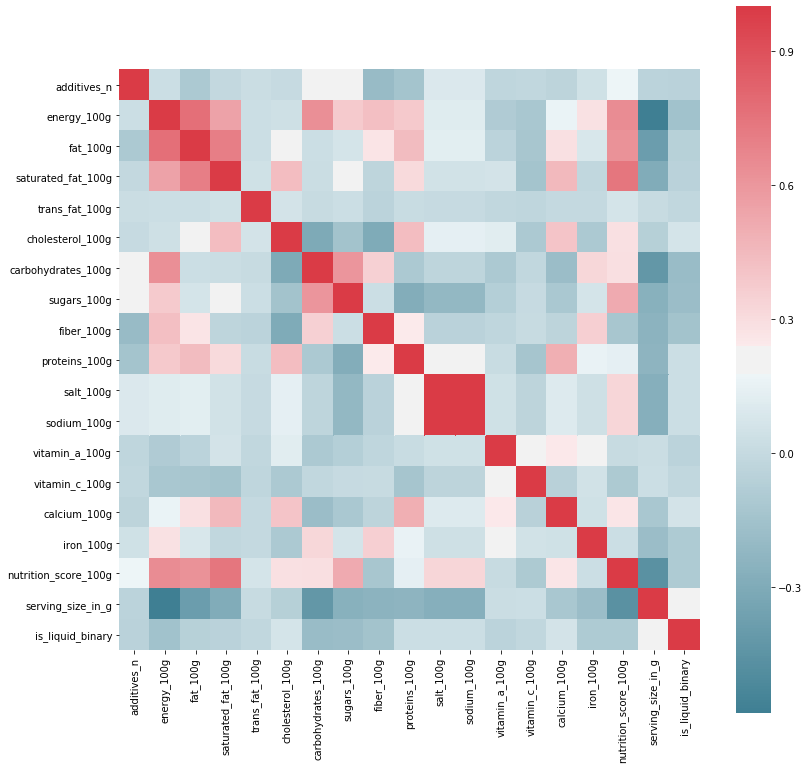

In [113]:
corr=wfd2.corr(method = "pearson")

f, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
plt.xticks(rotation=90)
plt.show()

When there is no correlation between 2 data fields (correlation is 0 or near 0) the color is gray. 
__The darkest red means there is a perfect positive correlation, while the darkest green means there is a perfect negative correlation.__

When evaluating the correlation between all the features, the The “corr()” method includes the correlation of each feature with itself, which is always 1, so that is why this type of graph always has the red diagonal from the upper left to the lower right. 
Other than the diagonal, the rest of the squares show correlation between different data fields, making it really easy to find that __“salt” and “sodium”__ are highly correlated, __“nutrition_score” and “saturated_fat”__ are highly correlated, __“energy” and “fat”__ are highly correlated, __“energy” and “carbohydrates”__ are highly correlated, __“fat” and “saturated_fat”__ have a correlation of about 0.5.

__The nutrition score is calutaed based upon different products and can have negative and positive values. Some nutrients have a stronger effect on nutrition score than others. A negative nutrition score has a positive effect and vice versa.__ (https://www.mynetdiary.com/food-score.html)

__Which items causes a low or a high nutritional score__

Data fields that have a __positive correlation__ with __nutrition_score_100g__ (have a negative effect on the score):

- saturated_fat_100g
- energy_100g
- fat_100g
- sugar_100g

Data fields that have a __negative correlation__ with __nutrition_score_100g__ (have a positive effect on the score):

- fiber_100g
- vitamin_c_100g
- vitamin_a_100g
- iron_100g
- transfat_100g
- carbohydrates_100g


__Provide some more insight (how does the correlation of the items with nutritional score looks like)__

Now we will use pairplot plot to view the data points with high correlation coefficients. We can right away notice an almost positive linear relationship between the salt_100g and sodium_100g (that why we exclude the variable 'sodium_100g' for our regression since it is so highly correlated with 'salt_100g').

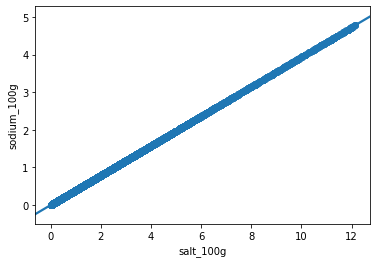

In [114]:
sns.regplot(wfd2['salt_100g'], wfd2['sodium_100g'])

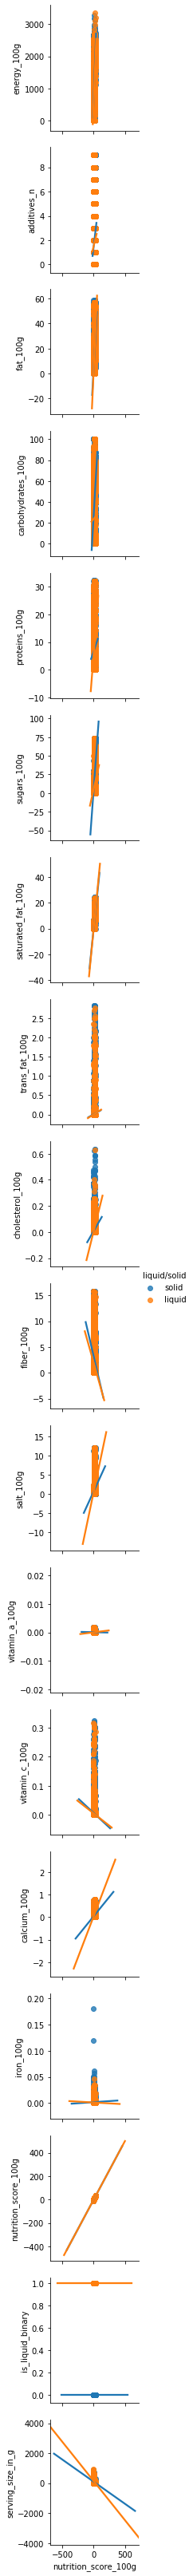

In [115]:
sns.pairplot( wfd2, hue='liquid/solid', 
             x_vars=['nutrition_score_100g'],
             y_vars= ['energy_100g', 'additives_n', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g',
                      'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'fiber_100g', 
                     'salt_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g', 
                     'iron_100g', 'nutrition_score_100g','is_liquid_binary', 'serving_size_in_g'], kind='reg')

plt.show()

The pairplot easly confirms the correlation between nutrution score and the distinct nutrients as we have seen in the heatmap. Furthermore it reveals that a linear correlation exists in most cases (except of iron and vitamin_a). Fiber has a strong negative linear correlation (the less fiber the higher the score, means it has the strongest positive effect on the score)

Whether a product is servered liqued or solid it does not effect much the nutrion score (solid products leads lightly to a higher nutrution score).

__Same plot without using option kind='reg'__

Pairplots reveal how 'nutrition_score_100g' relates with all other numeric variables. Using hue parameter with categorical variables 'nutrition_grafe_fr' shows if there is a difference if the products are liquid or solid.

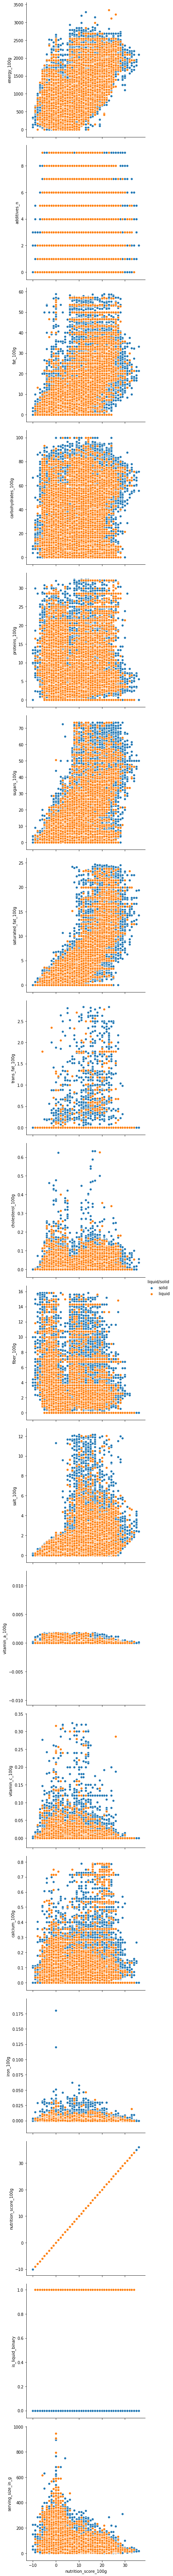

In [116]:
sns.pairplot(wfd2, height=5, hue='liquid/solid',
            x_vars=['nutrition_score_100g'],
            y_vars= ['energy_100g', 'additives_n', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g',
                      'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'fiber_100g', 
                     'salt_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g', 
                     'iron_100g', 'nutrition_score_100g','is_liquid_binary', 'serving_size_in_g'])

plt.show()

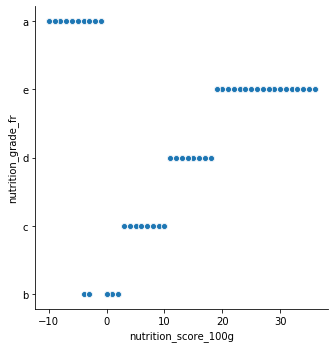

In [117]:
# how is relationship of nutrution grade and score
sns.pairplot(wfd2, height=5,
            x_vars=['nutrition_score_100g'],
            y_vars= ['nutrition_grade_fr'])

plt.show()

Nutrution grade A has lowest nutrution score while grade E has highest score

# B. Manipulating the data
You will work with the data to investigate some properties of your choice. Your goal is to choose 3 interesting questions to answer about the data and perform the necessary steps for the analysis.

The questions that you choose must be complex enough to allow for some substantial data manipulation. As a guideline here is a sample topic of analysis

Topic: Investigate the macronutrient breakdown across various foods (this is the percentage of calories that come from the 3 macronutrient groups: carbohydrates, protein and fats). What are the foods that have the highest ratios of each macronutrient? What are the foods that are most balanced? What is the macronutrient breakdown across different countries? Can you notice some trends or insights about the data?

For each of your 3 questions choose appropriate visual methods to communicate your findings.

__First we have to group our DataFrame by categories__

In [118]:
# DataFame data_exp_categories already contains all splitted categories
data_exp_categories.shape

(113432, 31)

In [119]:
print("There are {:,} unique categories in our data".format(data_exp_categories['categories_exp'].dropna().unique().shape[0]))

There are 524 unique categories in our data


In [120]:
data_exp_categories.head()

,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g,serving_size_in_g,is_liquid_binary,liquid/solid,categories_exp
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,NaN,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.0,60.71,17.86,7.1,17.86,0.63500,0.250,0.000000,0.0,0.071,0.00129,0.0,28.0,0.0,solid,NaN
0000000033640,2017-03-09 09:07:04,2017-03-09 09:07:05,Granola Cranberry And Acai,NaN,United States,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,NaN,c,NaN,1824.0,10.91,0.91,0.0,0.0,74.55,25.45,5.5,9.09,0.25400,0.100,0.000000,0.0,0.036,0.00262,6.0,55.0,0.0,solid,NaN
0000000033688,2017-03-09 09:07:04,2017-03-09 09:07:04,"Peanuts, Mixed Nuts",NaN,United States,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,E415 - Xanthan gum,d,NaN,2389.0,42.86,7.14,0.0,0.0,25.00,14.29,7.1,25.00,0.54356,0.214,0.000000,0.0,0.071,0.00514,14.0,28.0,0.0,solid,NaN
0000000043595,2017-03-09 09:07:04,2017-03-09 09:07:04,Cranberries,NaN,United States,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,NaN,c,NaN,1255.0,0.00,0.00,0.0,0.0,83.33,66.67,10.0,0.00,0.00000,0.000,0.000000,0.0,0.000,0.00000,8.0,30.0,0.0,solid,NaN
0000000045292,2017-03-09 14:32:38,2017-03-09 14:32:38,Turkish Apricots,NaN,United States,"Apricots, sulfur dioxide.",40 g (7 PIECES),1.0,E220 - Sulphur dioxide,c,NaN,1046.0,0.00,0.00,0.0,0.0,62.50,52.50,7.5,2.50,0.00000,0.000,0.001125,0.0,0.050,0.00360,8.0,40.0,0.0,solid,NaN


In [121]:
print('Thesee are five most common categories in our data:\n{}'.format(data_exp_categories['categories_exp'].value_counts().sort_values(ascending=False).head(5)))

Thesee are five most common categories in our data:
Plant-based foods and beverages    357
Plant-based foods                  352
Sugary snacks                      251
Cereals and potatoes               250
Groceries                          248
Name: categories_exp, dtype: int64


In [122]:
# Excluding Categories that appear less then 10 times in our data.
categories_filtered = data_exp_categories.groupby('categories_exp').filter(lambda x: len(x) >= 10)

In [123]:
# We group this dataframe by their categories
categories_grouped = categories_filtered.groupby('categories_exp')

In [124]:
categories_grouped.describe()

additives_n                                                energy_100g                                                                     fat_100g                                                                saturated_fat_100g                                                               trans_fat_100g                                                  cholesterol_100g                                                                     carbohydrates_100g             ... vitamin_a_100g           vitamin_c_100g                                                                calcium_100g                                                                 iron_100g                                                                     nutrition_score_100g                                                      serving_size_in_g                                                              is_liquid_binary                                              
                                      count      mean       std  min   25%  50%   75%  max       count         mean         std     min       25%     50%      75%     max    count       mean        std     min      25%     50%      75%    max              count       mean       std    min      25%     50%       75%    max          count      mean       std  min  25%  50%  75%      max            count      mean       std      min       25%       50%       75%      max              count       mean  ...            75%       max          count      mean       std  min      25%       50%       75%      max        count      mean       std    min       25%      50%       75%     max     count      mean       std      min       25%       50%       75%      max                count       mean       std   min    25%   50%    75%   max             count        mean         std    min     25%    50%     75%    max            count      mean       std  min  25%  50%   75%  max
categories_exp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Appetizers                             42.0  2.071429  1.879191  0.0  0.00  2.0  3.00  7.0        42.0  1938.571429  286.416049   879.0  1790.000  1950.0  2090.00  2690.0     42.0  19.091905   9.364823   0.000  13.4750  19.500  27.3250  35.70               42.0   4.101190  4.029468   0.00   1.6700   3.270   6.25000  16.10           42.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.00000             42.0  0.004570  0.014571  0.00000  0.000000  0.000000  0.000000  0.06322               42.0  65.392143  ...       0.000000  0.000107           42.0  0.006914  0.015447  0.0  0.00000  0.000000  0.006472  0.08570         42.0  0.048045  0.070546  0.000  0.000000  0.00000  0.071400  0.2710      42.0  0.002297  0.001732  0.00000  0.001290  0.001550  0.003600  0.00514                 42.0  11.523810  6.689045   0.0   7.00  11.0  16.00  27.0              42.0   16.023810   15.521013    1.0    2.25   11.0   28.00   55.0             42.0  0.285714  0.457230  0.0  0.0  0.0  1.00  1.0
Bars                                   15.0  1.600000  2.063284  0.0  0.00  1.0  2.00  6.0        15.0  

__Investigate the macronutrient breakdown across various foods (this is the percentage of calories that come from the 3 macronutrient groups: carbohydrates, protein and fats)__

__What are the foods that have the highest ratios of each macronutrient__

__1. Macronutrient Group: Fat__

In [125]:
fat_top_ten = categories_grouped['fat_100g'].describe().sort_values(by='mean',ascending=False).head(10)
fat_top_ten

,count,mean,std,min,25%,50%,75%,max
categories_exp,,,,,,,,
Oilseed purees,24.0,49.205833,3.442821,35.29,49.625,50.00,50.00,53.33
Nut butters,23.0,49.171304,3.515946,35.29,49.250,50.00,50.00,53.33
Peanut butters,18.0,48.582778,3.684463,35.29,47.300,50.00,50.00,53.12
Legume butters,18.0,48.582778,3.684463,35.29,47.300,50.00,50.00,53.12
Plant-based spreads,28.0,44.630000,12.550716,0.00,46.900,50.00,50.00,53.33
Spreads,35.0,40.433714,15.240196,0.00,32.400,50.00,50.00,53.33
Nuts and their products,38.0,39.872105,19.135009,1.04,44.075,50.00,50.00,53.60
Milk chocolates,13.0,34.428462,4.070159,30.00,31.000,32.97,36.80,42.50
Dark chocolates,11.0,33.627273,2.903478,31.10,31.600,32.50,34.65,40.50


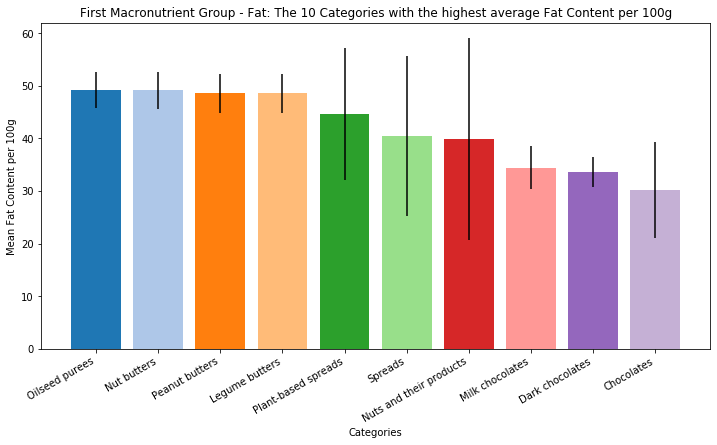

In [126]:
index = fat_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,fat_top_ten['mean'], yerr=fat_top_ten['std'], color=colormap)
plt.title('First Macronutrient Group - Fat: The 10 Categories with the highest average Fat Content per 100g')
plt.xlabel('Categories')
plt.ylabel('Mean Fat Content per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

__2. Macronutrient Group: Fat__

In [127]:
prot_top_ten = categories_grouped['proteins_100g'].describe().sort_values(by='mean',ascending=False).head(10)
prot_top_ten

,count,mean,std,min,25%,50%,75%,max
categories_exp,,,,,,,,
Legume butters,18.0,22.302778,1.668687,18.80,21.8850,21.90,21.90,25.00
Peanut butters,18.0,22.302778,1.668687,18.80,21.8850,21.90,21.90,25.00
Fishes,10.0,21.817000,5.126294,11.40,18.4250,23.10,25.65,28.57
Oilseed purees,24.0,21.030833,3.313486,12.50,21.0475,21.90,21.90,25.00
Nut butters,23.0,20.993913,3.382905,12.50,20.8950,21.90,21.90,25.00
Seafood,13.0,19.716154,7.091363,2.04,17.7000,20.00,24.00,28.57
Plant-based spreads,28.0,18.754286,6.550496,0.00,17.5625,21.88,21.90,25.00
Meats,21.0,16.893333,4.496836,10.00,12.7000,17.60,19.10,26.00
Nuts and their products,38.0,16.836447,8.675435,0.40,13.5425,21.54,21.90,28.10


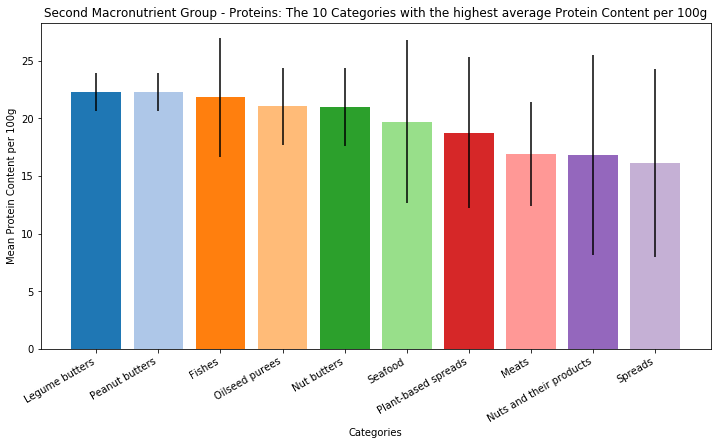

In [128]:
index = prot_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,prot_top_ten['mean'], yerr=prot_top_ten['std'], color=colormap)
plt.title('Second Macronutrient Group - Proteins: The 10 Categories with the highest average Protein Content per 100g')
plt.xlabel('Categories')
plt.ylabel('Mean Protein Content per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

__3. Macronutrient Group: carbohydrates__

In [129]:
carb_top_ten = categories_grouped['carbohydrates_100g'].describe().sort_values(by='mean',ascending=False).head(10)
carb_top_ten

,count,mean,std,min,25%,50%,75%,max
categories_exp,,,,,,,,
Breakfast cereals,33.0,80.806667,7.508621,59.40,78.60,81.6,86.700,89.7
Cereals and their products,98.0,71.592143,16.917522,3.57,70.60,75.0,80.450,89.7
Breakfasts,48.0,71.377083,19.533436,18.80,67.05,79.4,84.750,89.7
Pastas,41.0,71.079756,9.663897,29.90,72.00,73.2,75.000,89.1
Crackers,28.0,69.741786,7.896019,50.00,63.90,71.4,73.725,83.3
Biscuits,49.0,66.033673,8.146839,42.30,62.70,67.7,71.000,80.0
Cookies,35.0,65.522857,8.325054,42.30,62.95,65.4,70.300,80.0
Appetizers,42.0,65.392143,11.386439,22.50,60.70,66.7,73.300,83.3
Candies,21.0,63.514286,19.505801,20.00,58.80,67.6,73.700,92.5


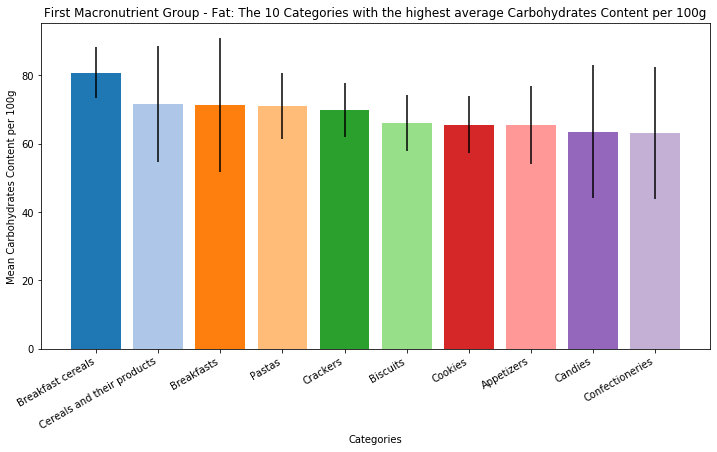

In [130]:
index=carb_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,carb_top_ten['mean'], yerr=carb_top_ten['std'], color=colormap)
plt.title('First Macronutrient Group - Fat: The 10 Categories with the highest average Carbohydrates Content per 100g')
plt.xlabel('Categories')
plt.ylabel('Mean Carbohydrates Content per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

__Categories that are least healty__

The higher the nutrition score of a product the less healthy it is.

In [131]:
nutscore_top_ten = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=False).head(10)
nutscore_top_ten

,count,mean,std,min,25%,50%,75%,max
categories_exp,,,,,,,,
Milk chocolates,13.0,22.923077,1.934836,18.0,23.00,23.0,24.00,26.0
Chocolates,39.0,20.641026,3.883075,11.0,19.00,21.0,23.00,27.0
Dark chocolates,11.0,20.636364,2.203303,17.0,19.50,21.0,21.00,26.0
Candies,21.0,19.333333,6.521758,4.0,14.00,22.0,23.00,27.0
Biscuits,49.0,18.632653,5.031956,8.0,16.00,19.0,22.00,29.0
Cookies,35.0,18.571429,5.175086,8.0,16.00,19.0,22.00,29.0
Confectioneries,24.0,18.500000,7.107865,4.0,13.50,22.0,23.00,27.0
Biscuits and cakes,60.0,17.900000,5.177199,5.0,15.00,19.0,21.25,29.0
Sugary snacks,251.0,16.338645,6.129344,-6.0,12.50,18.0,21.00,29.0


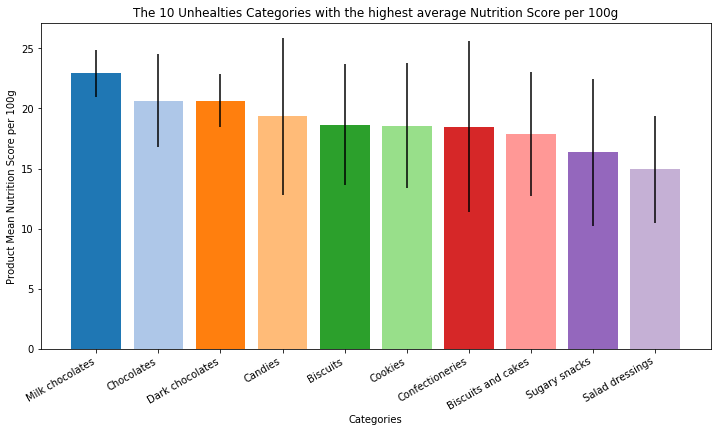

In [132]:
index=nutscore_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,nutscore_top_ten['mean'], yerr=nutscore_top_ten['std'], color=colormap)
plt.title('The 10 Unhealties Categories with the highest average Nutrition Score per 100g')
plt.xlabel('Categories')
plt.ylabel('Product Mean Nutrition Score per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

Milk chocolates are unhealthy while Sales dressings are healthier

__Categories that are most healty__

The loweer the nutrition score of a product the more healthy it is.

In [133]:
nutscore_top_ten = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True).head(10)
nutscore_top_ten

,count,mean,std,min,25%,50%,75%,max
categories_exp,,,,,,,,
Vegetables based foods,19.0,-4.684211,4.256402,-10.0,-7.0,-6.0,-3.5,5.0
Canned vegetables,13.0,-4.230769,4.815839,-10.0,-7.0,-6.0,-4.0,5.0
Canned plant-based foods,27.0,-4.111111,3.478874,-10.0,-6.0,-5.0,-3.0,5.0
Fruits and vegetables based foods,33.0,-3.363636,4.159463,-10.0,-6.0,-4.0,0.0,5.0
Pastas,41.0,-2.219512,6.758373,-6.0,-6.0,-6.0,-2.0,17.0
Fruits based foods,13.0,-1.846154,3.362691,-7.0,-4.0,-3.0,0.0,4.0
Canned foods,39.0,-1.641026,5.617113,-10.0,-6.0,-3.0,2.0,19.0
Seeds,11.0,-1.545455,4.782544,-7.0,-4.5,-2.0,-0.5,11.0
Greek yogurts,16.0,-1.375000,2.362908,-5.0,-2.0,-1.0,-1.0,5.0


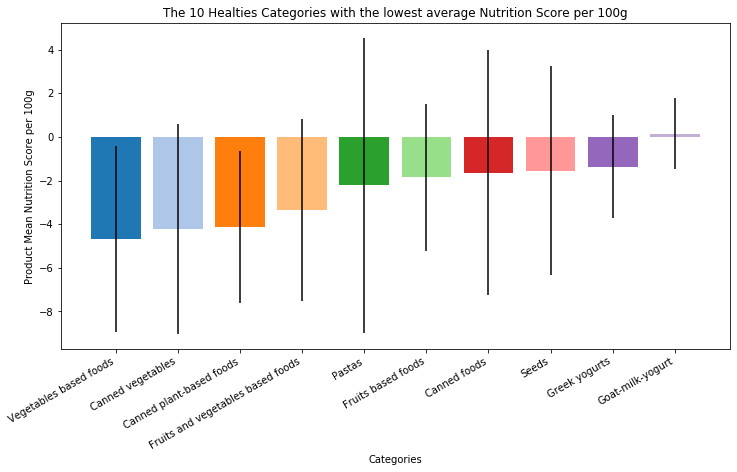

In [134]:
index=nutscore_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,nutscore_top_ten['mean'], yerr=nutscore_top_ten['std'], color=colormap)
plt.title('The 10 Healties Categories with the lowest average Nutrition Score per 100g')
plt.xlabel('Categories')
plt.ylabel('Product Mean Nutrition Score per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

Vagetables based foods is most healthies category

__Macronutrient Breakdown across different Countries__

__First we have to group our DataFrame by countries__

In [135]:
# DataFame data_exp_categories already contains all splitted countries
data_exp_countries.shape

(109744, 31)

In [136]:
print("There are {:,} unique categories in our data".format(data_exp_countries['countries_exp'].dropna().unique().shape[0]))

There are 23 unique categories in our data


In [137]:
print('This is the how often each Country appears in our data: \n{}'.format(data_exp_countries['countries_exp'].value_counts()))

This is the how often each Country appears in our data: 
United States                109484
Canada                          103
France                           94
United Kingdom                   13
Australia                        11
Switzerland                      10
Spain                             4
Belgium                           4
Singapore                         3
Saint Pierre and Miquelon         2
Italy                             2
Germany                           2
Tunisia                           2
Netherlands                       1
European Union                    1
Hong Kong                         1
Denmark                           1
Nederland                         1
Malaysia                          1
New Zealand                       1
Russia                            1
Thailand                          1
Colombia                          1
Name: countries_exp, dtype: int64


In [138]:
# Since there is just not enough data for all Countries, we will focus on The US, France, Canada, United Kingdom, Australia and Switzerland
data_exp_countries = data_exp_countries[(data_exp_countries['countries_exp']=='United States')|
                                        (data_exp_countries['countries_exp']=='France')|
                                        (data_exp_countries['countries_exp']=='United Kingdom')|
                                        (data_exp_countries['countries_exp']=='Australia')|
                                        (data_exp_countries['countries_exp']=='Switzerland')|
                                        (data_exp_countries['countries_exp']=='Canada')
                                       ]

In [139]:
# We group this dataframe by countries
countries_grouped = data_exp_countries.groupby('countries_exp')

In [140]:
countries_grouped.describe()

additives_n                                                energy_100g                                                                   fat_100g                                                            saturated_fat_100g                                                        trans_fat_100g                                               cholesterol_100g                                                     carbohydrates_100g             ... vitamin_a_100g           vitamin_c_100g                                                      calcium_100g                                                        iron_100g                                                                 nutrition_score_100g                                                    serving_size_in_g                                                        is_liquid_binary                                             
                     count      mean       std  min   25%  50%   75%  max       count         mean         std    min      25%     50%     75%     max     count       mean        std  min      25%    50%      75%    max              count      mean       std  min    25%    50%      75%    max          count      mean       std  min  25%  50%  75%   max            count      mean       std  min  25%  50%       75%    max              count       mean  ...            75%       max          count      mean       std  min  25%  50%       75%     max        count      mean       std  min  25%      50%      75%    max     count      mean       std  min       25%       50%       75%      max                count       mean       std   min   25%   50%   75%   max             count       mean        std   min   25%   50%     75%    max            count      mean       std  min  25%  50%  75%  max
countries_exp                                                                                                                                                                                                                                                                                                                                                                                                                                                          ...                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Australia             11.0  0.909091  1.375103  0.0  0.00  0.0  1.00  4.0        11.0  1015.909091  698.378329  274.0   484.50   837.0  1262.5  2423.0      11.0  15.159091  14.606623  0.0   4.8500   8.82  21.0000  41.86               11.0  6.671818  9.354115  0.0  0.935  2.200   9.0950  23.50           11.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.00             11.0  0.002091  0.004011  0.0  0.0  0.0  0.002000  0.012               11.0  25.128182  ...       0.000032  0.000316           11.0  0.000827  0.001214  0.0  0.0  0.0  0.001700  0.0032         11.0  0.033182  0.038935  0.0  0.0  0.02800  0.05850  0.105      11.0  0.001774  0.002047  0.0  0.000380  0.001570  0.001945  0.00711                 11.0   8.363636  7.446781  -3.0   2.0  10.0  12.5  20.0              11.0  18.636364  14.548352   1.0   7.0  17.0   26.50   43.0             11.0  0.090909  0.301511  0.0  0.0  0.0  0.0  1.0
Canada               103.0  2.058252  2.013802  0.0  0.00  2.0  3.50  7.0       103.0   977.097087  689.634542    0.0   335.00   985.0  1390.0  2610.0     103.0  10.446835  11.719139  0.0   1.3150   5.63  16.7000  48.40              103.0  3.812321  5.210958  0.0  0.180  1.500   4.9500  21.40          103.0  0.084067  0.234365  0.0  0.0  0.0  0.0  1.33            103.0  0.015066  0.039916  0.0  0.0  0.0  0.0

In [141]:
country_fat_top_ten = countries_grouped['fat_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_fat_top_ten

,count,mean,std,min,25%,50%,75%,max
countries_exp,,,,,,,,
Switzerland,10.0,21.112000,11.715578,0.0,19.8050,26.10,27.6500,32.40
Australia,11.0,15.159091,14.606623,0.0,4.8500,8.82,21.0000,41.86
France,94.0,13.625032,13.526605,0.0,1.2525,10.00,21.3975,50.00
United Kingdom,13.0,12.529231,9.754126,0.0,4.7100,13.75,18.8900,30.00
United States,109484.0,12.343652,13.614773,0.0,0.8800,7.14,21.1100,58.93
Canada,103.0,10.446835,11.719139,0.0,1.3150,5.63,16.7000,48.40


In [142]:
country_carbs_top_ten = countries_grouped['carbohydrates_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_carbs_top_ten

,count,mean,std,min,25%,50%,75%,max
countries_exp,,,,,,,,
Switzerland,10.0,48.526000,19.232313,13.1,47.450,56.18,60.3000,64.9
France,94.0,42.347500,27.966157,0.0,13.475,50.87,63.1825,89.7
United States,109484.0,34.403028,27.626391,0.0,8.480,26.44,60.0000,100.0
United Kingdom,13.0,34.052308,29.863923,0.0,5.360,26.47,67.6500,75.0
Canada,103.0,29.467019,25.671449,0.0,6.815,20.00,51.0000,82.8
Australia,11.0,25.128182,24.506452,2.3,7.450,13.00,38.8850,80.0


In [143]:
country_proteins_top_ten = countries_grouped['proteins_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_proteins_top_ten

,count,mean,std,min,25%,50%,75%,max
countries_exp,,,,,,,,
United States,109484.0,7.449414,6.973774,0.0,2.380,5.470,10.710,32.26
France,94.0,7.056702,6.427121,0.0,2.320,5.560,8.695,26.42
Canada,103.0,6.856505,5.861495,0.0,2.735,5.260,10.000,26.00
Switzerland,10.0,5.609000,4.001545,0.2,3.825,5.305,8.150,12.96
Australia,11.0,5.172727,2.543191,0.0,4.275,5.000,7.435,8.30
United Kingdom,13.0,4.660769,4.577285,0.0,1.110,4.710,6.670,15.60


In [144]:
country_nutscore_top_ten = countries_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_nutscore_top_ten

,count,mean,std,min,25%,50%,75%,max
countries_exp,,,,,,,,
Switzerland,10.0,15.500000,9.143911,-3.0,13.0,19.5,22.0,23.0
France,94.0,10.925532,8.949367,-8.0,2.0,12.0,18.0,29.0
United Kingdom,13.0,9.384615,8.646179,-4.0,1.0,11.0,14.0,21.0
United States,109484.0,8.876658,8.950126,-10.0,1.0,9.0,16.0,36.0
Australia,11.0,8.363636,7.446781,-3.0,2.0,10.0,12.5,20.0
Canada,103.0,6.475728,8.601008,-9.0,0.0,4.0,12.5,25.0


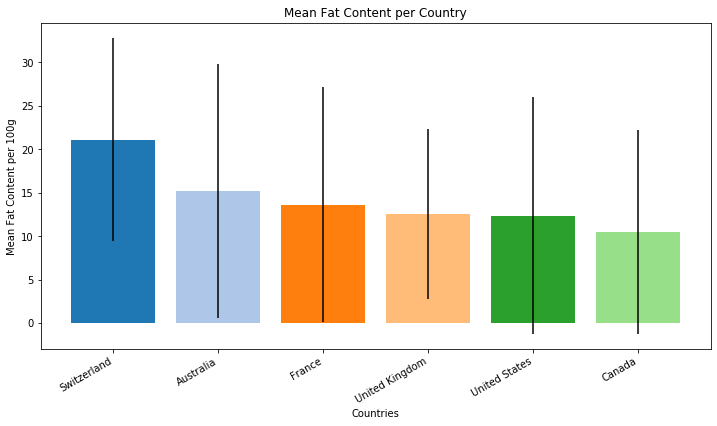

In [145]:
index=country_fat_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,country_fat_top_ten['mean'], yerr=country_fat_top_ten['std'], color=colormap)
plt.title('Mean Fat Content per Country')
plt.xlabel('Countries')
plt.ylabel('Mean Fat Content per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

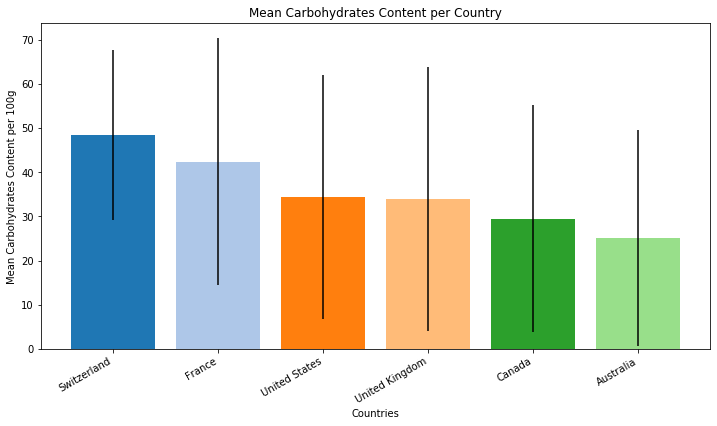

In [146]:
index=country_carbs_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,country_carbs_top_ten['mean'], yerr=country_carbs_top_ten['std'], color=colormap)
plt.title('Mean Carbohydrates Content per Country')
plt.xlabel('Countries')
plt.ylabel('Mean Carbohydrates Content per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

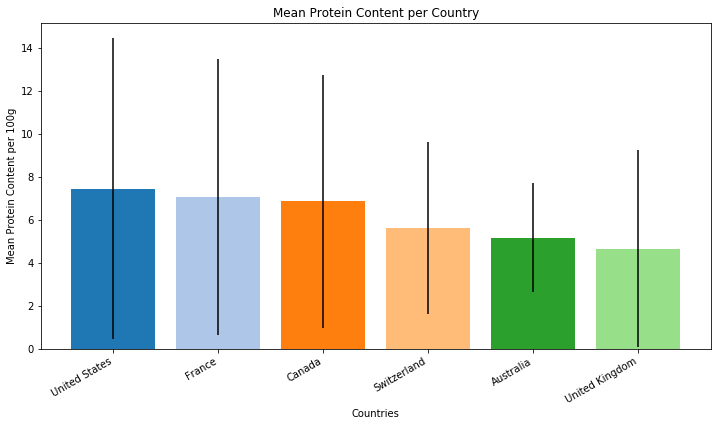

In [147]:
index=country_proteins_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,country_proteins_top_ten['mean'], yerr=country_proteins_top_ten['std'], color=colormap)
plt.title('Mean Protein Content per Country')
plt.xlabel('Countries')
plt.ylabel('Mean Protein Content per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

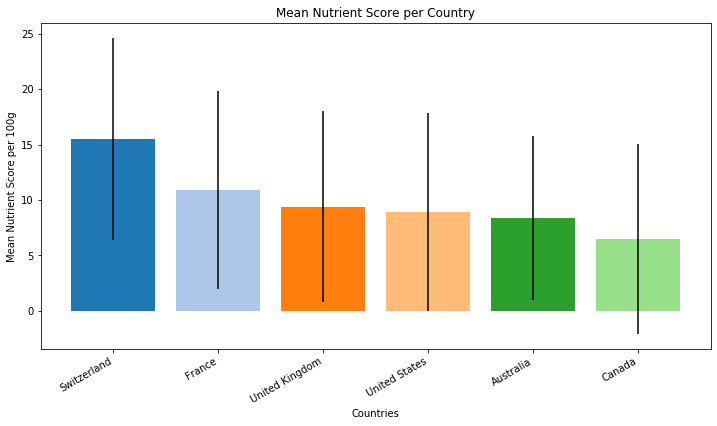

In [148]:
index=country_nutscore_top_ten.index
plt.figure(figsize=(12,6))
x_pos = range(len(index))
colormap = plt.cm.tab20(range(0, 10))
plt.bar(x_pos,country_nutscore_top_ten['mean'], yerr=country_nutscore_top_ten['std'], color=colormap)
plt.title('Mean Nutrient Score per Country')
plt.xlabel('Countries')
plt.ylabel('Mean Nutrient Score per 100g')
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right");
plt.show()

It looks like Switzerland is least healthiest country with respect to analiezed nutrient score of the product categories. However we should consider that we do not have got many datas from Switzerland.